In [24]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [25]:
import math
import random
from matplotlib.patches import FancyArrowPatch
from matplotlib import patheffects as pe

In [26]:
backend_asset = pd.read_csv('/Users/ngantram/Documents/Thesis UvA/Thesis/data 1.0/backend_asset.csv', delimiter=',')
backend_assetrelationship = pd.read_csv('/Users/ngantram/Documents/Thesis UvA/Thesis/data 1.0/backend_assetrelationship.csv', delimiter=',')
backend_assetrelationshipservice = pd.read_csv('/Users/ngantram/Documents/Thesis UvA/Thesis/data 1.0/backend_assetrelationshipservice.csv', delimiter=',')
backend_assettype = pd.read_csv('/Users/ngantram/Documents/Thesis UvA/Thesis/data 1.0/backend_assettype.csv', delimiter=',')

/var/folders/w6/y_7zdy0j1r1b354yw7wj0vgc0000gn/T/ipykernel_1601/3425762865.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  backend_asset = pd.read_csv('/Users/ngantram/Documents/Thesis UvA/Thesis/data 1.0/backend_asset.csv', delimiter=',')


In [27]:
backend_assetrelationshipservice 

,id,source_port,target_port,protocol,date_created,date_updated,relationship_id,source_component_id,target_component_id,count,bytes
0,63377c6c-c6dc-4c03-bb6c-31ab25373230,14189,514,TCP,2024-10-09 20:56:07.838805 +00:00,2024-10-09 20:56:07.838822 +00:00,1701dcf6-f20b-49a0-b138-87c2d5f2b50f,78db5643-d170-44eb-ad13-a5a8e83fa5e5,7caa8d7a-8402-4b01-b0c6-8a557719b990,0,0
1,aa9648c6-8f68-488c-b18c-ad78a7ddca03,14187,514,TCP,2024-10-09 20:56:15.637901 +00:00,2024-10-09 20:56:15.637917 +00:00,1701dcf6-f20b-49a0-b138-87c2d5f2b50f,78db5643-d170-44eb-ad13-a5a8e83fa5e5,8f08cb9d-8ecb-49df-9c33-9fecdd1d12aa,0,0
2,2cc4f843-8e74-43b5-a669-b7b86a6c9359,137,137,UDP,2024-10-09 21:25:33.169921 +00:00,2024-10-09 21:25:33.169938 +00:00,57b1f348-aa21-4a3e-a7b4-a277bdae41db,ba8e2f73-af01-40ce-aaec-466ee2496819,9a5edc1f-9ae5-4cfd-a7d1-e0c8249f6316,0,0
3,99fe6733-d4e3-41c9-8fdb-205402290cd4,4241,514,UDP,2024-10-09 21:28:02.626333 +00:00,2024-10-09 21:28:02.626356 +00:00,1701dcf6-f20b-49a0-b138-87c2d5f2b50f,78db5643-d170-44eb-ad13-a5a8e83fa5e5,91d0c239-c186-4b55-ae6f-e79183cf6185,0,0
4,4dc2f655-5d2d-4b6d-b9bc-038e245edb1c,40266,10050,TCP,2024-10-10 14:56:19.089385 +00:00,2024-10-10 14:56:19.089403 +00:00,f70f9f5a-858a-4758-b23d-19a112a2c827,1c400022-0b8c-4f96-be98-c3fcf97f58ea,b009ff76-cea1-4281-8564-f477f43d4d4c,1,78
...,...,...,...,...,...,...,...,...,...,...,...
810090,0bfcd069-536a-4b54-a28b-33550f9e4272,39846,443,TCP,2025-01-11 14:41:39.419352 +00:00,2025-01-11 14:41:39.419371 +00:00,0e71d67b-ba76-4f22-b261-1fe3c49f7382,8d50e58a-7911-49ab-8aa2-e46dc72c88c9,82f31acb-7a22-42ba-8d1e-51c71c165a53,9,1481
810091,bb0f66a3-d297-4203-bb6e-46129dc1680c,55239,443,TCP,2025-01-11 14:44:02.066732 +00:00,2025-01-11 14:44:02.066762 +00:00,2c4f9865-86d7-46b3-921f-362acfb51a04,8919d322-0dc8-401b-89e9-57d0fe820755,0382927d-ea55-4e48-955e-e3cd65f71c2c,501,53679
810092,65631eee-45d2-43cb-b1b5-9d8bb598fc91,443,54480,TCP,2025-01-10 19:12:16.004417 +00:00,2025-01-10 19:12:16.004433 +00:00,f4e71ea3-1547-46e0-bc68-f945eaf1eae5,189fae18-a24b-40a2-85b2-195d8c3855d3,8919d322-0dc8-401b-89e9-57d0fe820755,723,233314
810093,69b03003-a833-43a6-a1a9-012d3af755f4,443,55239,TCP,2025-01-11 14:44:03.193135 +00:00,2025-01-11 14:44:03.193164 +00:00,1580dd24-d216-4c67-bbbb-6d579a09d7f2,0382927d-ea55-4e48-955e-e3cd65f71c2c,8919d322-0dc8-401b-89e9-57d0fe820755,999,98299


**Aggregate data**

In [28]:
# Categorize assets in backend_assets
asset_merged = backend_asset.merge(
    backend_assettype[['id', 'category']],
    left_on='asset_type_id',
    right_on='id',
    how='left',
    suffixes=('', '_type')
)
asset_merged['category'] = asset_merged['category'].fillna('Uncategorized')
asset_merged.head()

,id,name,hostname,ipaddress,active,date_created,date_updated,assigned_value,asset_type_id,location_id,mac_address,estimated_value,computed_value,vlan_ids,last_reported,parent_asset_id,processing_state,id_type,category
0,93c84f4c-e251-443e-aedb-0f6d08fbbbb0,NaN,ec2-3-230-209-14.compute-1.amazonaws.com.,192.168.102.11/24,True,2024-10-31 12:17:34.266569 +00:00,2025-03-10 10:11:19.677025 +00:00,0,656c360c-f7e0-4026-b421-771f273958d2,a5bf22d9-1b8a-4e95-9c19-2c4fbae70f29,b6:b9:76:54:2d:f6,430,430,{2102},2025-02-02 11:20:48.000000 +00:00,0c9d1848-0ee1-4641-a7da-2a7313c45b74,PROCESSED,656c360c-f7e0-4026-b421-771f273958d2,Other
1,1c3225eb-bd10-4065-8528-f8d5f42cff5b,NaN,NaN,192.168.45.15/24,True,2024-11-21 21:51:25.292424 +00:00,2025-03-10 10:11:19.128591 +00:00,0,12d5edc6-3b58-404e-93c4-1967b56e3c6d,a5bf22d9-1b8a-4e95-9c19-2c4fbae70f29,00:09:0f:09:00:06,0,0,{2102},2025-02-09 01:35:20.000000 +00:00,1fe7e185-f0fb-44bc-a41f-9a357e3ff77f,PROCESSED,12d5edc6-3b58-404e-93c4-1967b56e3c6d,Network
2,3e5887e1-9b95-4884-91a2-e67ec01d83ba,NaN,NaN,192.168.101.138/24,True,2025-01-11 11:57:55.251735 +00:00,2025-03-10 10:11:19.430381 +00:00,0,12d5edc6-3b58-404e-93c4-1967b56e3c6d,a5bf22d9-1b8a-4e95-9c19-2c4fbae70f29,00:09:0f:09:00:06,0,0,{120},2025-02-15 20:04:00.000000 +00:00,926411cd-ed42-44e4-ab52-c8edea870c45,PROCESSED,12d5edc6-3b58-404e-93c4-1967b56e3c6d,Network
3,cbc95c38-42fe-473a-bcdb-63869fb7f7d5,NaN,NaN,192.168.0.139,True,2024-12-16 20:09:26.114348 +00:00,2025-03-10 10:11:20.169085 +00:00,0,12d5edc6-3b58-404e-93c4-1967b56e3c6d,a5bf22d9-1b8a-4e95-9c19-2c4fbae70f29,00:09:0f:09:00:06,0,0,{2101},2025-01-20 05:04:13.000000 +00:00,NaN,PROCESSED,12d5edc6-3b58-404e-93c4-1967b56e3c6d,Network
4,dc032904-bec1-4296-8f84-c06a48fbbe28,NaN,DTNBATELIER.sasyb.local.,192.168.103.136/24,True,2025-01-09 14:56:37.313210 +00:00,2025-03-10 10:11:18.436401 +00:00,0,12d5edc6-3b58-404e-93c4-1967b56e3c6d,a5bf22d9-1b8a-4e95-9c19-2c4fbae70f29,00:09:0f:09:00:06,10,10,{120},2025-02-06 15:26:47.000000 +00:00,a4c6b641-dcf8-4a1f-a4c6-4b68aac086b8,PROCESSED,12d5edc6-3b58-404e-93c4-1967b56e3c6d,Network


In [29]:
relationship_merged = backend_assetrelationshipservice[
    backend_assetrelationshipservice['relationship_id'].isin(backend_assetrelationship['id'])]
relationship_merged.head()

,id,source_port,target_port,protocol,date_created,date_updated,relationship_id,source_component_id,target_component_id,count,bytes
0,63377c6c-c6dc-4c03-bb6c-31ab25373230,14189,514,TCP,2024-10-09 20:56:07.838805 +00:00,2024-10-09 20:56:07.838822 +00:00,1701dcf6-f20b-49a0-b138-87c2d5f2b50f,78db5643-d170-44eb-ad13-a5a8e83fa5e5,7caa8d7a-8402-4b01-b0c6-8a557719b990,0,0
1,aa9648c6-8f68-488c-b18c-ad78a7ddca03,14187,514,TCP,2024-10-09 20:56:15.637901 +00:00,2024-10-09 20:56:15.637917 +00:00,1701dcf6-f20b-49a0-b138-87c2d5f2b50f,78db5643-d170-44eb-ad13-a5a8e83fa5e5,8f08cb9d-8ecb-49df-9c33-9fecdd1d12aa,0,0
2,2cc4f843-8e74-43b5-a669-b7b86a6c9359,137,137,UDP,2024-10-09 21:25:33.169921 +00:00,2024-10-09 21:25:33.169938 +00:00,57b1f348-aa21-4a3e-a7b4-a277bdae41db,ba8e2f73-af01-40ce-aaec-466ee2496819,9a5edc1f-9ae5-4cfd-a7d1-e0c8249f6316,0,0
3,99fe6733-d4e3-41c9-8fdb-205402290cd4,4241,514,UDP,2024-10-09 21:28:02.626333 +00:00,2024-10-09 21:28:02.626356 +00:00,1701dcf6-f20b-49a0-b138-87c2d5f2b50f,78db5643-d170-44eb-ad13-a5a8e83fa5e5,91d0c239-c186-4b55-ae6f-e79183cf6185,0,0
4,4dc2f655-5d2d-4b6d-b9bc-038e245edb1c,40266,10050,TCP,2024-10-10 14:56:19.089385 +00:00,2024-10-10 14:56:19.089403 +00:00,f70f9f5a-858a-4758-b23d-19a112a2c827,1c400022-0b8c-4f96-be98-c3fcf97f58ea,b009ff76-cea1-4281-8564-f477f43d4d4c,1,78


In [30]:
relationship_merged = relationship_merged.merge(
   backend_assetrelationship[['id','source_asset_id','target_asset_id']],
    how='left',
    left_on='relationship_id',
    right_on='id'
).drop(columns=['id_x', 'source_component_id', 'target_component_id', 'date_created', 'date_updated'])  

relationship_merged.head()

,source_port,target_port,protocol,relationship_id,count,bytes,id_y,source_asset_id,target_asset_id
0,14189,514,TCP,1701dcf6-f20b-49a0-b138-87c2d5f2b50f,0,0,1701dcf6-f20b-49a0-b138-87c2d5f2b50f,e1f47d6d-7a65-49c4-b8a5-42301fce796b,e94e74c4-10aa-4428-a83d-43e20cbe8458
1,14187,514,TCP,1701dcf6-f20b-49a0-b138-87c2d5f2b50f,0,0,1701dcf6-f20b-49a0-b138-87c2d5f2b50f,e1f47d6d-7a65-49c4-b8a5-42301fce796b,e94e74c4-10aa-4428-a83d-43e20cbe8458
2,137,137,UDP,57b1f348-aa21-4a3e-a7b4-a277bdae41db,0,0,57b1f348-aa21-4a3e-a7b4-a277bdae41db,5a5466d4-4031-4897-a25a-ba996941e528,3c9a3f1f-5d91-49d7-8c33-ec66ee352e32
3,4241,514,UDP,1701dcf6-f20b-49a0-b138-87c2d5f2b50f,0,0,1701dcf6-f20b-49a0-b138-87c2d5f2b50f,e1f47d6d-7a65-49c4-b8a5-42301fce796b,e94e74c4-10aa-4428-a83d-43e20cbe8458
4,40266,10050,TCP,f70f9f5a-858a-4758-b23d-19a112a2c827,1,78,f70f9f5a-858a-4758-b23d-19a112a2c827,c937fafc-ea45-4f7b-9210-fd81a0faa687,c70a0cf1-2390-49db-b090-b9ab9695ec4b


**Original computed ALE**

In [31]:
min_value = asset_merged['computed_value'].min()
max_value = asset_merged['computed_value'].max()
mean_value = asset_merged['computed_value'].mean()


print(f"Minimum: {min_value}")
print(f"Maximum: {max_value}")
print(f"Average: {mean_value}")

Minimum: 0
Maximum: 2118262
Average: 49.925171038824764


In [32]:
relationship_merged[['bytes', 'count']].describe().style.format({"bytes": "{:.2f}", "count": "{:.2f}"})

,bytes,count
count,810095.00,810095.00
mean,2225688.61,1925.53
std,1094701629.55,759314.07
min,0.00,0.00
25%,70.00,1.00
50%,448.00,5.00
75%,6464.50,19.00
max,957988493901.00,661389039.00


**Transforming "count" and "bytes" data**

- The logarithm of 0 is undefined (log(0) → -∞), which will cause an error or NaN in plots/calculations
- Adding 1 ensures all values are ≥1: log(0 + 1) = log(1) = 0

In [33]:
#Compute log-normalized features to reduce skew
max_count = relationship_merged['count'].max() or 1
max_bytes = relationship_merged['bytes'].max() or 1

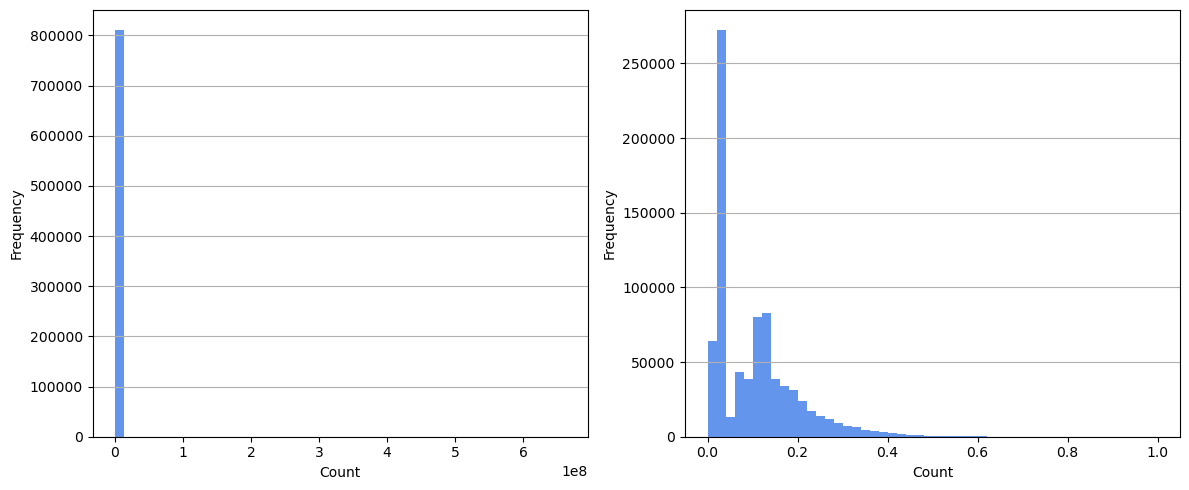

In [34]:
relationship_merged['lin_score_c'] = relationship_merged['count']
relationship_merged['log_score_c'] = (np.log1p(relationship_merged['count']) - relationship_merged['count'].min()) / (np.log1p(max_count) - relationship_merged['count'].min())

# Plot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Linear score histogram
axes[0].hist(relationship_merged['lin_score_c'], bins=50, color='cornflowerblue')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Frequency')
axes[0].grid(axis='y')  

# Log score histogram
axes[1].hist(relationship_merged['log_score_c'], bins=50, color='cornflowerblue')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Frequency')
axes[1].grid(axis='y')  

plt.tight_layout()
plt.show()

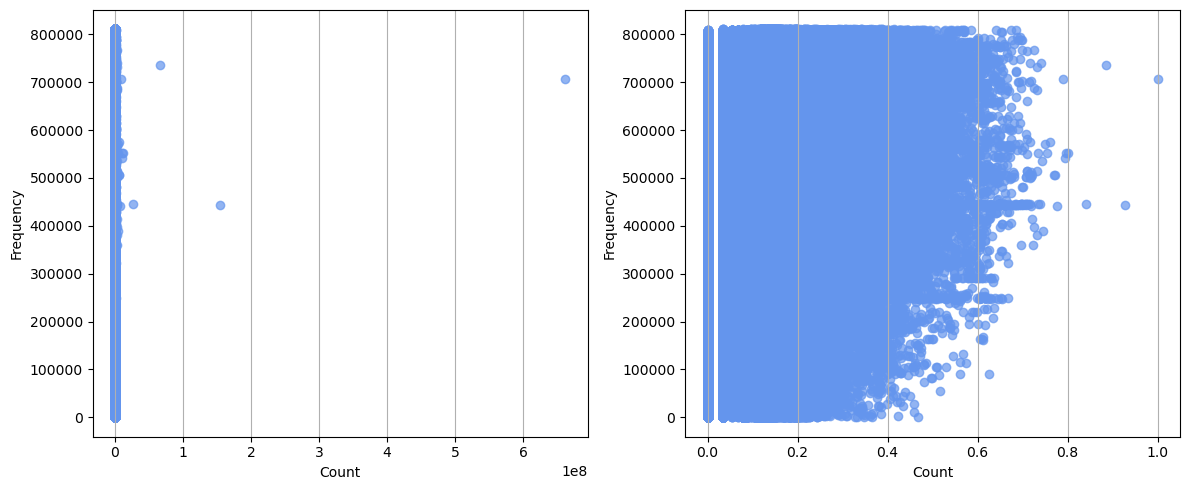

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].scatter(relationship_merged['lin_score_c'], relationship_merged.index, alpha=0.7, color='cornflowerblue')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Frequency')
axes[0].grid(axis='x') 

axes[1].scatter(relationship_merged['log_score_c'], relationship_merged.index, alpha=0.7, color='cornflowerblue')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Frequency')
axes[1].grid(axis='x')

plt.tight_layout()
plt.show()

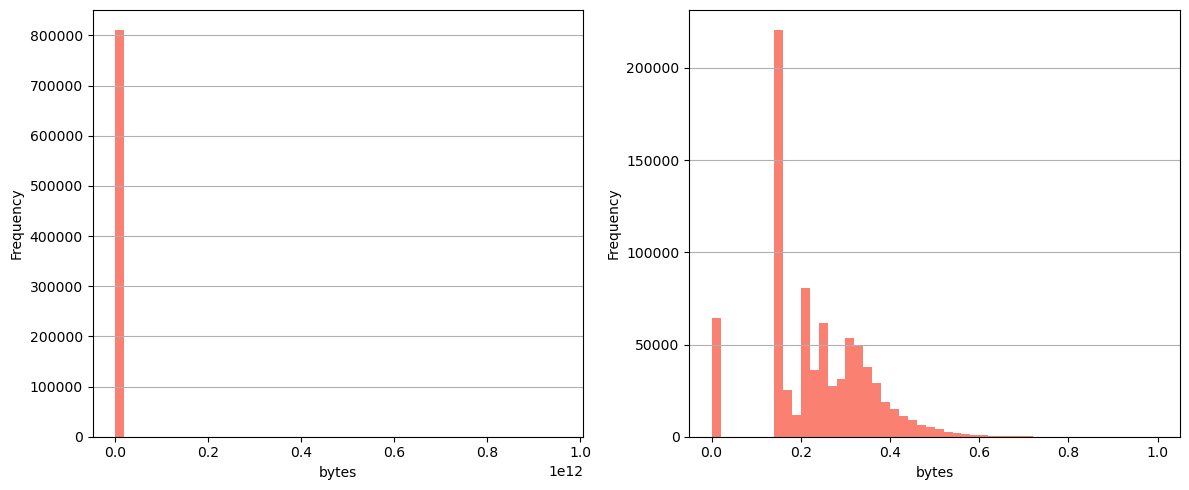

In [36]:
relationship_merged['lin_score_b'] = relationship_merged['bytes']
relationship_merged['log_score_b'] = (np.log1p(relationship_merged['bytes']) - relationship_merged['bytes'].min()) / (np.log1p(max_bytes) - relationship_merged['bytes'].min())

# Plot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Linear score histogram
axes[0].hist(relationship_merged['lin_score_b'], bins=50, color='salmon')
axes[0].set_xlabel('bytes')
axes[0].set_ylabel('Frequency')
axes[0].grid(axis='y')  

# Log score histogram
axes[1].hist(relationship_merged['log_score_b'], bins=50, color='salmon')
axes[1].set_xlabel('bytes')
axes[1].set_ylabel('Frequency')
axes[1].grid(axis='y')  

plt.tight_layout()
plt.show()

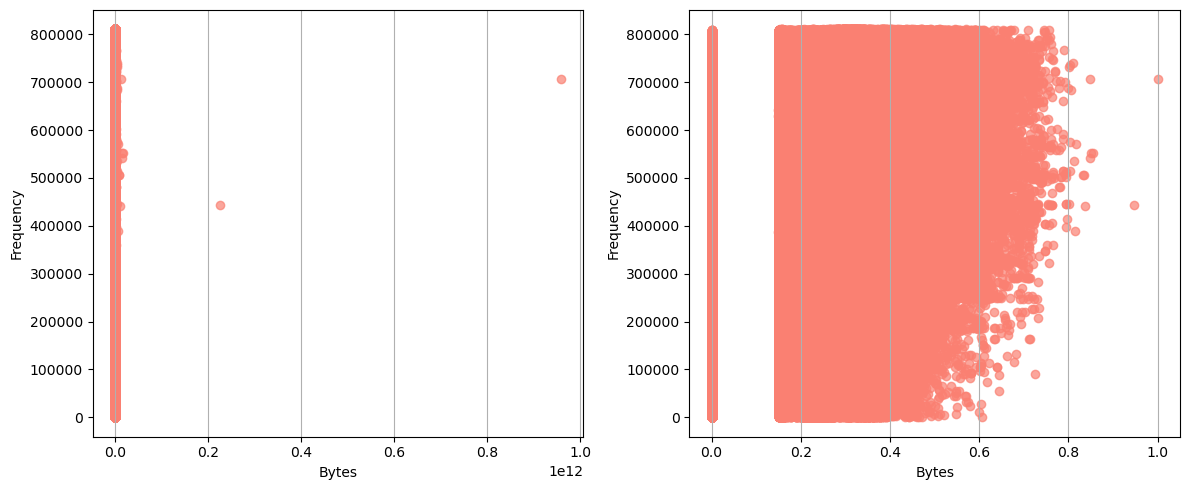

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].scatter(relationship_merged['lin_score_b'], relationship_merged.index, alpha=0.7, color='salmon')
axes[0].set_xlabel('Bytes')
axes[0].set_ylabel('Frequency')
axes[0].grid(axis='x') 

axes[1].scatter(relationship_merged['log_score_b'], relationship_merged.index, alpha=0.7, color='salmon')
axes[1].set_xlabel('Bytes')
axes[1].set_ylabel('Frequency')
axes[1].grid(axis='x')

plt.tight_layout()
plt.show()

In [38]:
G = nx.DiGraph()

for _, row in relationship_merged.iterrows():
    source = row['source_asset_id']
    target = row['target_asset_id']
    count = row['count']
    bytes_transferred = row['bytes']
    
    G.add_edge(
        source,
        target,
        count=count,
        bytes=bytes_transferred,
        relationship_id=row['relationship_id']
    )


In [39]:
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

Number of nodes: 91354
Number of edges: 333759


In [40]:
edge_data = [
    {
        'source': u,
        'target': v,
        'count': data.get('count', 0),
        'bytes': data.get('bytes', 0),
        'relationship_id': data.get('relationship_id', None)
    }
    for u, v, data in G.edges(data=True)
]
edges = pd.DataFrame(edge_data)
edges.head(5)

,source,target,count,bytes,relationship_id
0,e1f47d6d-7a65-49c4-b8a5-42301fce796b,e94e74c4-10aa-4428-a83d-43e20cbe8458,93756,13782297,1701dcf6-f20b-49a0-b138-87c2d5f2b50f
1,e94e74c4-10aa-4428-a83d-43e20cbe8458,93e63cdb-acc1-41da-ac13-2b00f1b4ec50,2090,984449,3ce372bf-e690-4b40-a838-a6e0552590df
2,e94e74c4-10aa-4428-a83d-43e20cbe8458,2833fccb-5df7-45a0-b4ce-99c086af9333,293,25411,28d49ff1-198a-42b1-acb2-d221c4243a52
3,e94e74c4-10aa-4428-a83d-43e20cbe8458,641c5883-00ae-4e16-9007-7a4c604b829b,216,20304,eec4999a-5788-4067-bee0-47ac21e5ae62
4,e94e74c4-10aa-4428-a83d-43e20cbe8458,b7d1fee9-ad6f-4497-8154-ff378e6cdd59,80366,7307905,e5a94038-d45b-4ba6-92cf-14f6c12be164


In [41]:
edges = edges.merge(
    asset_merged[['id', 'category']],
    how='left',
    left_on='source',
    right_on='id'
).drop(columns=['id'])

edges = edges.merge(
    asset_merged[['id', 'category']],  
    how='left',
    left_on='target',  
    right_on='id'
).drop(columns=['id']) 

edges = edges.rename(columns={
    'category_x': 'source_type',  
    'category_y': 'target_type'   
})

edges.head(5)

,source,target,count,bytes,relationship_id,source_type,target_type
0,e1f47d6d-7a65-49c4-b8a5-42301fce796b,e94e74c4-10aa-4428-a83d-43e20cbe8458,93756,13782297,1701dcf6-f20b-49a0-b138-87c2d5f2b50f,Network,IT
1,e94e74c4-10aa-4428-a83d-43e20cbe8458,93e63cdb-acc1-41da-ac13-2b00f1b4ec50,2090,984449,3ce372bf-e690-4b40-a838-a6e0552590df,IT,Network
2,e94e74c4-10aa-4428-a83d-43e20cbe8458,2833fccb-5df7-45a0-b4ce-99c086af9333,293,25411,28d49ff1-198a-42b1-acb2-d221c4243a52,IT,IT
3,e94e74c4-10aa-4428-a83d-43e20cbe8458,641c5883-00ae-4e16-9007-7a4c604b829b,216,20304,eec4999a-5788-4067-bee0-47ac21e5ae62,IT,Network
4,e94e74c4-10aa-4428-a83d-43e20cbe8458,b7d1fee9-ad6f-4497-8154-ff378e6cdd59,80366,7307905,e5a94038-d45b-4ba6-92cf-14f6c12be164,IT,Network


In [42]:
indegree = dict(G.in_degree())
outdegree = dict(G.out_degree())

nodes = pd.DataFrame({
    'node': list(G.nodes()),
    'in_degree': [indegree.get(node, 0) for node in G.nodes()],
    'out_degree': [outdegree.get(node, 0) for node in G.nodes()]
})
nodes['degree_total'] = nodes['in_degree'] + nodes['out_degree']
nodes = nodes.merge(
    asset_merged[['id', 'category']],
    how='left',
    left_on='node',
    right_on='id'
).drop(columns=['id'])

nodes.sort_values(by=['in_degree', 'out_degree'], ascending=False)

,node,in_degree,out_degree,degree_total,category
27,48dcb782-a6f0-4863-b070-dac5deacb858,11702,20536,32238,Network
8,a551fc87-630f-4b89-8b43-4e89325c43cc,9479,9489,18968,Network
49,2793f9b1-baa0-49d0-84b9-85ecc32bbb4a,6454,6764,13218,IT
90,d84478e3-ec75-427a-a219-2053c49ef78e,5842,5948,11790,IT
680,51235dd2-ab6e-493c-aeef-2ced33114883,4592,4634,9226,IT
...,...,...,...,...,...
90994,26f66155-4b44-44f8-a018-c886040fa449,0,1,1,Uncategorized
91064,efb9aa6e-c39b-442b-9140-0fb600b55022,0,1,1,Uncategorized
91169,e337203b-238b-414a-821a-106d3f4c4280,0,1,1,Uncategorized
91182,3a5f0092-05f9-49d6-b353-0e852314203a,0,1,1,Uncategorized


# **External-attack probability p_j**

**Connectivity risk**

In [43]:
category = nodes['category'].value_counts()
print("Number of assets per type:")
category

Number of assets per type:


category
Network          62956
Uncategorized    27931
IT                 218
Other              171
OT                  52
IoT                 26
Name: count, dtype: int64

In [44]:
avg_deg_by_type = (
    nodes
      .groupby('category')[['in_degree','out_degree', 'degree_total']]
      .mean()
      .rename(columns={
          'in_degree':  'avg_in_degree',
          'out_degree': 'avg_out_degree',
          'degree_total':  'avg_total_degree'
      })
)
avg_deg_by_type.sort_values(by='avg_total_degree', ascending = False).round(2)

,avg_in_degree,avg_out_degree,avg_total_degree
category,,,
IT,415.72,489.28,905.01
Other,193.83,193.87,387.70
IoT,33.31,35.04,68.35
OT,4.48,4.88,9.37
Network,2.64,2.65,5.29
Uncategorized,1.52,0.92,2.45


In [46]:
# Calculate degree centrality
degree_centrality = nx.degree_centrality(G)
# Calculate betweennss centrality
betweenness_centrality = nx.betweenness_centrality(G)
# Calculate betweennss centrality
closeness_centrality = nx.closeness_centrality(G)

In [47]:
nodes['degree_centrality'] = nodes['node'].map(degree_centrality)
nodes['betweenness_centrality'] = nodes['node'].map(betweenness_centrality)
nodes['closeness_centrality'] = nodes['node'].map(closeness_centrality)
alpha, beta, delta = 0.4, 0.4, 0.2

nodes['connectivity_risk'] = (
    alpha * nodes['degree_centrality'] +
    beta  * nodes['betweenness_centrality'] +
    delta * nodes['closeness_centrality']
)

#Min–max normalize connectivity_risk to [0,1]
cr_min = nodes['connectivity_risk'].min()
cr_max = nodes['connectivity_risk'].max()
nodes['connectivity_risk'] = (
    (nodes['connectivity_risk'] - cr_min) /
    (cr_max - cr_min)
).fillna(0)

nodes[['node','degree_centrality','betweenness_centrality','closeness_centrality','connectivity_risk']].sort_values(ascending=False, by='connectivity_risk').head()

,node,degree_centrality,betweenness_centrality,closeness_centrality,connectivity_risk
27,48dcb782-a6f0-4863-b070-dac5deacb858,0.352895,0.033715,0.120448,1.000000
38,a807012c-4456-4764-8e5a-4f52610429d5,0.228082,0.101447,0.153794,0.909566
49,2793f9b1-baa0-49d0-84b9-85ecc32bbb4a,0.144691,0.041718,0.169022,0.606301
8,a551fc87-630f-4b89-8b43-4e89325c43cc,0.207634,0.010777,0.103762,0.604896
90,d84478e3-ec75-427a-a219-2053c49ef78e,0.129060,0.031665,0.167096,0.546664


In [48]:
nodes.groupby('category')[['degree_centrality', 'betweenness_centrality', 'closeness_centrality', 'connectivity_risk']].mean().sort_values(by='connectivity_risk', ascending=False)

,degree_centrality,betweenness_centrality,closeness_centrality,connectivity_risk
category,,,,
IT,0.009907,1.851294e-03,0.127537,0.169006
Other,0.004244,7.124704e-04,0.120684,0.146116
OT,0.000103,6.461870e-06,0.113657,0.127403
IoT,0.000748,6.794563e-05,0.097297,0.110678
Network,0.000058,4.513962e-06,0.094143,0.105462
Uncategorized,0.000027,4.469130e-07,0.091239,0.102134


In [49]:
nodes.to_csv('/Users/ngantram/Documents/Thesis UvA/Thesis/code/connectivity_risk.csv', index=False)

**Asset based risk**

In [50]:
# Step 1: Compute mean connectivity risk per category
mean_risk = (
    nodes
    .groupby('category')['connectivity_risk']
    .mean()
)

# Step 2: Sort categories by average risk (ascending)
sorted_cats = mean_risk.sort_values(ascending=False).index.tolist()

# Step 3: Force 'OT' to top of the list (always highest baseline)
if 'OT' in sorted_cats:
    sorted_cats.remove('OT')
sorted_cats = ['OT'] + sorted_cats  # OT always first

# Step 4: Assign linearly spaced base values from 0.08 to 0.02
base_max = 0.08
base_min = 0.02
n = len(sorted_cats)
step = (base_max - base_min) / (n - 1) if n > 1 else 0

category_base = {
    cat: base_max - i * step
    for i, cat in enumerate(sorted_cats)
}


In [51]:
category_base

{'OT': 0.08,
 'IT': 0.068,
 'Other': 0.056,
 'IoT': 0.044,
 'Network': 0.032,
 'Uncategorized': 0.020000000000000004}

In [52]:
df_pj = nodes.copy()

df_pj['cat_mean_risk'] = df_pj['category'].map(mean_risk)
df_pj['base_c'] = df_pj['category'].map(category_base)

df_pj['p_j'] = df_pj.apply(
    #if conn_risk == cat_mean → no change; if higher → proportionally higher)
    lambda row: min(1.0, row['base_c'] * (row['connectivity_risk'] / row['cat_mean_risk']))
    if row['cat_mean_risk'] > 0 else row['base_c'],
    axis=1
)

p_j = df_pj[['node', 'connectivity_risk', 'cat_mean_risk', 'base_c', 'p_j']]
p_j

,node,connectivity_risk,cat_mean_risk,base_c,p_j
0,e1f47d6d-7a65-49c4-b8a5-42301fce796b,0.086825,0.105462,0.032,0.026345
1,e94e74c4-10aa-4428-a83d-43e20cbe8458,0.105631,0.169006,0.068,0.042501
2,5a5466d4-4031-4897-a25a-ba996941e528,0.123877,0.146116,0.056,0.047477
3,3c9a3f1f-5d91-49d7-8c33-ec66ee352e32,0.149844,0.127403,0.080,0.094091
4,c937fafc-ea45-4f7b-9210-fd81a0faa687,0.128287,0.169006,0.068,0.051616
...,...,...,...,...,...
91349,00c4dabf-27e1-4779-8f86-c862c934d6f1,0.113435,0.102134,0.020,0.022213
91350,42c33c0e-13e5-4803-9b2b-9a22a8de524d,0.113435,0.102134,0.020,0.022213
91351,cc4707d7-d8d5-40a8-aeca-a6132b910a61,0.125648,0.102134,0.020,0.024604
91352,5a0ffd44-02f7-408e-a9c8-72d87d7b3da6,0.130798,0.102134,0.020,0.025613


In [53]:
p_j_category = p_j.merge(
    asset_merged[['id', 'category']],
    left_on='node',
    right_on='id',
    how='left',
    suffixes=('', '_type')
)
p_j_category['category'] = p_j_category['category'].fillna('Uncategorized')
p_j_category.sort_values(by='p_j', ascending=False).head(10)

,node,connectivity_risk,cat_mean_risk,base_c,p_j,id,category
38,a807012c-4456-4764-8e5a-4f52610429d5,0.909566,0.169006,0.068,0.365966,a807012c-4456-4764-8e5a-4f52610429d5,IT
27,48dcb782-a6f0-4863-b070-dac5deacb858,1.000000,0.105462,0.032,0.303427,48dcb782-a6f0-4863-b070-dac5deacb858,Network
49,2793f9b1-baa0-49d0-84b9-85ecc32bbb4a,0.606301,0.169006,0.068,0.243947,2793f9b1-baa0-49d0-84b9-85ecc32bbb4a,IT
90,d84478e3-ec75-427a-a219-2053c49ef78e,0.546664,0.169006,0.068,0.219952,d84478e3-ec75-427a-a219-2053c49ef78e,IT
147,3521f0d3-3827-4876-ab23-fc8634ae3d40,0.471492,0.169006,0.068,0.189706,3521f0d3-3827-4876-ab23-fc8634ae3d40,IT
8,a551fc87-630f-4b89-8b43-4e89325c43cc,0.604896,0.105462,0.032,0.183542,a551fc87-630f-4b89-8b43-4e89325c43cc,Network
680,51235dd2-ab6e-493c-aeef-2ced33114883,0.454815,0.169006,0.068,0.182996,51235dd2-ab6e-493c-aeef-2ced33114883,IT
43,8bf1fc05-b2aa-4bc9-90ab-0513e0af6ff1,0.397681,0.169006,0.068,0.160008,8bf1fc05-b2aa-4bc9-90ab-0513e0af6ff1,IT
1297,eda0a7d1-6a6f-48db-90da-578fc6ba55b8,0.393113,0.169006,0.068,0.158170,eda0a7d1-6a6f-48db-90da-578fc6ba55b8,IT
8149,f5fd482a-794e-4a5f-aac3-f2754d231380,0.343279,0.169006,0.068,0.138119,f5fd482a-794e-4a5f-aac3-f2754d231380,IT


In [54]:
p_j_category.describe().style.format({
    "connectivity_risk": "{:.2f}",
    "cat_mean_risk": "{:.2f}",
    "p_j": "{:.2f}"
})

,connectivity_risk,cat_mean_risk,base_c,p_j
count,91354.00,91354.00,91354.000000,91354.00
mean,0.10,0.10,0.028493,0.03
std,0.04,0.00,0.006103,0.01
min,0.00,0.10,0.020000,0.00
25%,0.07,0.10,0.020000,0.02
50%,0.13,0.11,0.032000,0.03
75%,0.13,0.11,0.032000,0.04
max,1.00,0.17,0.080000,0.37


In [55]:
p_j_category.groupby('category').describe()

connectivity_risk                                          \
                          count      mean       std       min       25%   
category                                                                  
IT                        218.0  0.169006  0.094734  0.000000  0.128413   
IoT                        26.0  0.110678  0.065822  0.000000  0.103801   
Network                 62956.0  0.105462  0.038075  0.000000  0.072100   
OT                         52.0  0.127403  0.009702  0.120404  0.120428   
Other                     171.0  0.146116  0.059913  0.000000  0.124858   
Uncategorized           27931.0  0.102134  0.047182  0.000000  0.072100   

                                            cat_mean_risk            ...  \
                    50%       75%       max         count      mean  ...   
category                                                             ...   
IT             0.154799  0.179445  0.909566         218.0  0.169006  ...   
IoT            0.142753  0.158263  0.187501          26.0  0.110678  ...   
Network        0.128561  0.135611  1.000000       62956.0  0.105462  ...   
OT             0.126013  0.126013  0.160620          52.0  0.127403  ...   
Other          0.148937  0.165875  0.328975         171.0  0.146116  ...   
Uncategorized  0.128561  0.129821  0.197683       27931.0  0.102134  ...   

              base_c             p_j                                       \
                 75%    max    count   mean       std       min       25%   
category                                                                    
IT             0.068  0.068    218.0  0.068  0.038116  0.000000  0.051667   
IoT            0.044  0.044     26.0  0.044  0.026168  0.000000  0.041266   
Network        0.032  0.032  62956.0  0.032  0.011553  0.000000  0.021877   
OT             0.080  0.080     52.0  0.080  0.006092  0.075605  0.075620   
Other          0.056  0.056    171.0  0.056  0.022962  0.000000  0.047853   
Uncategorized  0.020  0.020  27931.0  0.020  0.009239  0.000000  0.014119   

                                             
                    50%       75%       max  
category                                     
IT             0.062284  0.072200  0.365966  
IoT            0.056751  0.062917  0.074541  
Network        0.039009  0.041148  0.303427  
OT             0.079127  0.079127  0.100858  
Other          0.057081  0.063573  0.126082  
Uncategorized  0.025175  0.025422  0.038711  

[6 rows x 32 columns]

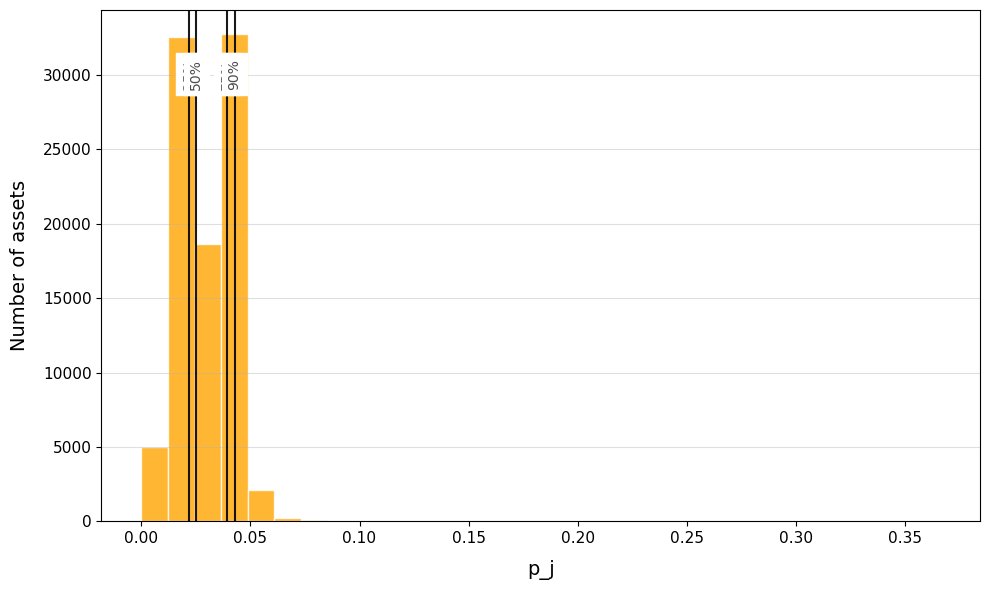

In [56]:
percentiles = [25, 50, 75, 90]
perc_values = np.percentile(p_j_category['p_j'], percentiles)

plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(
    p_j_category['p_j'],
    bins=30,
    edgecolor='white',
    color='orange', 
    alpha=0.8  
)
plt.grid(axis='y', linestyle='-', alpha=0.4)
y_max = n.max()
for p, val in zip(percentiles, perc_values):
    plt.axvline(
        x=val,
        color='black',
        linestyle='-',
        linewidth=1.5,
        alpha=0.9
    )
    plt.text(
        val,
        y_max * 0.95,
        f"{p}%",
        rotation=90,
        color='black',
        fontsize=10,
        ha='center',
        va='top',
        backgroundcolor='white',
        alpha=0.7
    )

plt.xlabel("p_j", fontsize=14, labelpad=10)
plt.ylabel("Number of assets", fontsize=14, labelpad=10)

plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()

plt.show()

/Users/ngantram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ngantram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ngantram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ngantram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf va

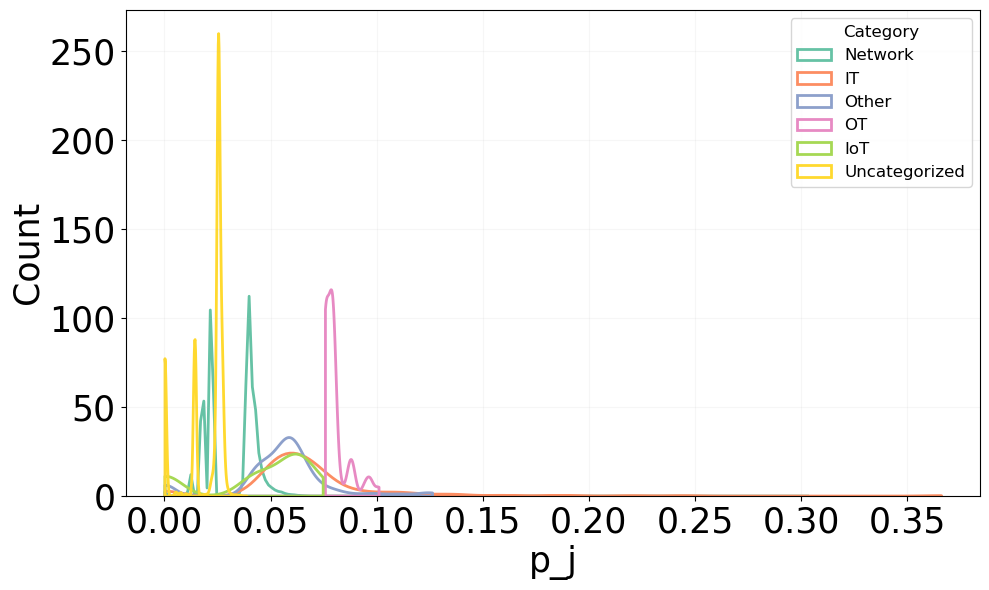

In [58]:
import seaborn as sns

categories = p_j_category['category'].unique()
palette = dict(zip(categories, sns.color_palette("Set2", len(categories))))

plt.figure(figsize=(10, 6))

for cat in categories:
    subset = p_j_category[p_j_category['category'] == cat]
    sns.kdeplot(
        data=subset,
        x='p_j',
        fill=True,
        label=cat,
        alpha=0,
        linewidth=2,
        color=palette[cat],
        clip=(0, 1),     
        cut=0,          
        bw_adjust=0.6    
    )

plt.xlabel("p_j", fontsize=25)
plt.ylabel("Count", fontsize=25)
plt.legend(title="Category", fontsize=12, title_fontsize=12)
plt.grid(True, linestyle='-', alpha=0.1)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.tight_layout()
plt.show()


/Users/ngantram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ngantram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ngantram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ngantram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf va

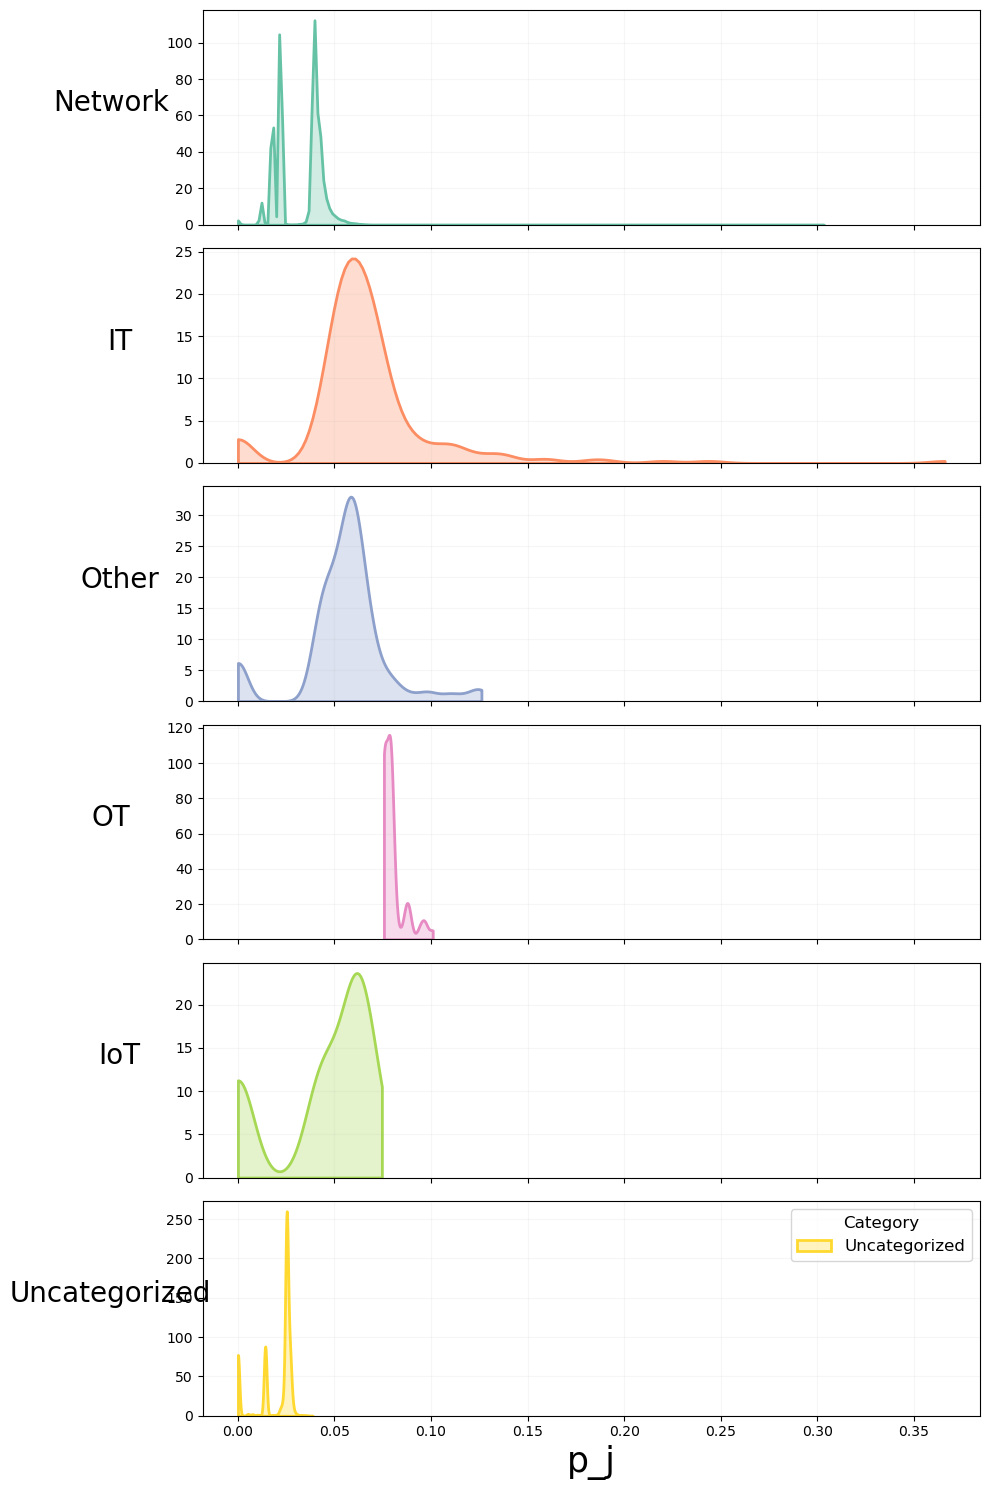

In [59]:
cats = p_j_category['category'].unique()
palette = dict(zip(cats, sns.color_palette("Set2", len(cats))))

fig, axes = plt.subplots(len(cats), 1, sharex=True, figsize=(10, 2.5*len(cats)))

for ax, cat in zip(axes, cats):
    subset = p_j_category[p_j_category['category'] == cat]
    sns.kdeplot(
        data=subset,
        x='p_j',
        fill=True,
        label=cat,
        alpha=0.3,
        linewidth=2,
        color=palette[cat],
        clip=(0,1),
        cut=0,
        bw_adjust=0.6,
        ax=ax
    )
    ax.set_ylabel(cat, rotation=0, labelpad=40, fontsize=20)
    ax.legend().remove()
    ax.grid(True, linestyle='-', alpha=0.1)

axes[-1].set_xlabel("p_j", fontsize=25)
axes[-1].legend(title="Category", fontsize=12, title_fontsize=12, loc='upper right')

plt.tight_layout()
plt.show()


Build edge metrics lookup, normalizing count & bytes to derive p_edge

In [60]:
import numpy as np

# Log-normalize 'count' and 'bytes' columns
max_count = edges['count'].max() or 1
max_bytes = edges['bytes'].max() or 1

edges['norm_cnt'] = np.log1p(edges['count']) / np.log1p(max_count)
edges['norm_byt'] = np.log1p(edges['bytes']) / np.log1p(max_bytes)

# Tunable parameters
p0 = 0.05                     # baseline risk
alpha_beta_sum = 0.95
alpha = (4 / 7) * alpha_beta_sum   # 4:3 ratio
beta = (3 / 7) * alpha_beta_sum

edges['p_ij'] = (
    p0
    + alpha * edges['norm_cnt']
    + beta  * edges['norm_byt']
).clip(upper=1.0)  

p_ij = {
    (row.source, row.target): {
        'p_ij': row.p_ij,
        'count': row['count'],
        'bytes': row['bytes']
    }
    for _, row in edges.iterrows()
}

In [61]:
df_p_ij = pd.DataFrame([
    {
        'source': src,
        'target': tgt,
        'p_ij': vals['p_ij'],
        'count':  vals.get('count', 0),
        'bytes':  vals.get('bytes', 0),
    }
    for (src, tgt), vals in p_ij.items()
])

df_p_ij.sort_values('p_ij', ascending=False)

,source,target,p_ij,count,bytes
88907,a52170d6-b8c3-4754-bbed-1703f7e7673c,51868828-0428-4ed1-9ea1-88e75ecf49e3,1.000000,661389039,957988493901
705,ccef7626-94c0-49db-8ab1-4167f8d09aae,b0c1b7f7-e177-441f-9c7e-141f36222c0d,0.939680,153624266,226222694170
88898,51868828-0428-4ed1-9ea1-88e75ecf49e3,a52170d6-b8c3-4754-bbed-1703f7e7673c,0.858566,65587659,4334876706
177879,9b0f856e-6f4c-4c46-a94a-023af7923deb,77fb5cf3-cfe3-4367-b6a2-e25ccd04e4b2,0.832765,11557363,17509286180
10617,b0c1b7f7-e177-441f-9c7e-141f36222c0d,ccef7626-94c0-49db-8ab1-4167f8d09aae,0.832304,26171251,3861842699
...,...,...,...,...,...
197567,b037d342-47ac-4d5d-80f4-b2e0479e39de,a807012c-4456-4764-8e5a-4f52610429d5,0.050000,0,0
278266,c5a0031e-9cd0-4efe-9899-02d21495435a,48dcb782-a6f0-4863-b070-dac5deacb858,0.050000,0,0
197579,cfbd3bc4-42b8-4ab9-89ac-ffe5aac0df68,a91550e0-8f77-46da-8511-7264ee5cad0b,0.050000,0,0
278250,124ef209-fc1c-4440-96c0-d816da584075,48dcb782-a6f0-4863-b070-dac5deacb858,0.050000,0,0


In [62]:
edges.sort_values(by='p_ij', ascending=False).head(5)


,source,target,count,bytes,relationship_id,source_type,target_type,norm_cnt,norm_byt,p_ij
88907,a52170d6-b8c3-4754-bbed-1703f7e7673c,51868828-0428-4ed1-9ea1-88e75ecf49e3,661389039,957988493901,c2050dec-6d70-483a-8980-66d7761cd95a,IT,IT,1.000000,1.000000,1.000000
705,ccef7626-94c0-49db-8ab1-4167f8d09aae,b0c1b7f7-e177-441f-9c7e-141f36222c0d,153624266,226222694170,d9294c63-b591-4ca8-b02e-435d1bb6f41b,IT,Network,0.928122,0.947683,0.939680
88898,51868828-0428-4ed1-9ea1-88e75ecf49e3,a52170d6-b8c3-4754-bbed-1703f7e7673c,65587659,4334876706,75b35f17-794a-474a-8299-4be6a291c188,IT,IT,0.886215,0.804331,0.858566
177879,9b0f856e-6f4c-4c46-a94a-023af7923deb,77fb5cf3-cfe3-4367-b6a2-e25ccd04e4b2,11557363,17509286180,9c4d52ab-8854-4415-bf05-f7c930323cb3,Network,IT,0.800736,0.854934,0.832765
10617,b0c1b7f7-e177-441f-9c7e-141f36222c0d,ccef7626-94c0-49db-8ab1-4167f8d09aae,26171251,3861842699,a90c235e-19f3-4b98-9b7b-82e496c0a9f8,Network,IT,0.840980,0.800142,0.832304


In [63]:
# Filter for high-risk internal exploit edges
high_risk_edges = edges[edges['p_ij'] > 0.75]

# Find most common source and target
most_common_source = high_risk_edges['source'].value_counts().idxmax()
most_common_target = high_risk_edges['target'].value_counts().idxmax()

# Display frequencies
source_counts = high_risk_edges['source'].value_counts()
target_counts = high_risk_edges['target'].value_counts()

print("Most frequent source (p_ij > 0.75):", most_common_source)
print("Occurrences:", source_counts[most_common_source])
print("\nMost frequent target (p_ij > 0.75):", most_common_target)
print("Occurrences:", target_counts[most_common_target])


Most frequent source (p_ij > 0.75): ccef7626-94c0-49db-8ab1-4167f8d09aae
Occurrences: 1

Most frequent target (p_ij > 0.75): a551fc87-630f-4b89-8b43-4e89325c43cc
Occurrences: 4


In [64]:
high_risk_edges.shape

(32, 10)

In [65]:
total = len(high_risk_edges)
source_counts = high_risk_edges['source_type'].value_counts(normalize=True) * 100
target_counts = high_risk_edges['target_type'].value_counts(normalize=True) * 100

category_summary = pd.DataFrame({
    'category': sorted(set(source_counts.index).union(target_counts.index)),
    'source (%)': [source_counts.get(cat, 0) for cat in sorted(set(source_counts.index).union(target_counts.index))],
    'target (%)': [target_counts.get(cat, 0) for cat in sorted(set(source_counts.index).union(target_counts.index))]
})
category_summary = category_summary.round(2)
category_summary.sort_values(by='source (%)', ascending=False)

,category,source (%),target (%)
1,Network,68.75,25.00
0,IT,18.75,65.62
3,Uncategorized,9.38,0.00
2,Other,3.12,9.38


**BAG** 

In [67]:
N = nodes['node'].tolist() #Node set N
T = {node: 'OR' for node in N} #Node types T: default to 'OR' for all nodes
and_nodes = []  
for node in and_nodes:
    if node in T:
        T[node] = 'AND'

E = list(p_ij.keys())

In [68]:
BAG = {
    'nodes': N,
    'types': T,
    'edges': E,
    'p_int': p_ij,
    'p_ext': p_j
}

Build parent lists

In [69]:
node_list = p_j['node'].tolist()

parents_new = {j: [] for j in node_list}
for (i, j), val in p_ij.items():
    parents_new[j].append((i, val['p_ij']))

Run fixed‐point propagation to solve for all P_j

In [72]:
def compute_marginals(p_ext_map, parents, clamp=None, max_iter=200, tol=1e-6):
    """
    Fixed‐point solve for P_j = P(X_j=1).
    If clamp is given as {node: value}, those P[node] stay fixed each iteration.
    """
    clamp = clamp or {}
    # 1) Initialize P_j = leak_j (or clamped value if provided)
    P = {
        j: (clamp[j] if j in clamp else p_ext_map.get(j, 0.01))
        for j in parents
    }

    for _ in range(max_iter):
        P_new = P.copy()
        for j, preds in parents.items():
            if j in clamp:
                # keep the clamped value
                P_new[j] = clamp[j]
                continue

            # start with no‐compromise = (1 − external leak)
            p_no = 1 - p_ext_map.get(j, 0.0)
            # fold in each parent's contribution
            for i, rho_ij in preds:
                p_no *= (1 - rho_ij * P[i])
            P_new[j] = 1 - p_no

        # check convergence
        delta = max(abs(P_new[j] - P[j]) for j in P)
        P = P_new
        if delta < tol:
            break

    return P


In [73]:
parents = { j: [] for j in BAG['nodes'] }
for (i, j), val in BAG['p_int'].items():
    parents[j].append((i, val['p_ij']))

#run fixed‐point (no evidence -> steady‐state compromise)
P_base_0 = compute_marginals(BAG['p_ext'], parents)
P_base_0_df = pd.DataFrame.from_dict(P_base_0, orient='index', columns=['P_base'])
P_base_0_df.sort_values(by='P_base', ascending=False).head(30)


,P_base
4ff84b48-590f-4326-9b9c-ba6c66fd5171,1.0
112a625f-2a7c-459d-aade-cdfa501d21c2,1.0
10fcfd68-f699-4f99-b2de-c496b451507a,1.0
d2a6cf03-160c-4a86-aa7c-c074620abf04,1.0
dc2f440a-e11a-4f76-b3f6-d162dd3cf2cb,1.0
eead3cda-9cca-4931-89ad-894529d55813,1.0
7f2dbe66-33a8-466a-8c45-6fd46fc677d2,1.0
d84478e3-ec75-427a-a219-2053c49ef78e,1.0
0e8a9963-b9d0-46e3-a3a8-fd7eac1e464c,1.0
37b6aa1c-47e2-43d3-85b0-7738a3bd8f3d,1.0


In [74]:
P_base_0_df.to_csv('/Users/ngantram/Documents/Thesis UvA/Thesis/code/Network_results.csv', index=True)

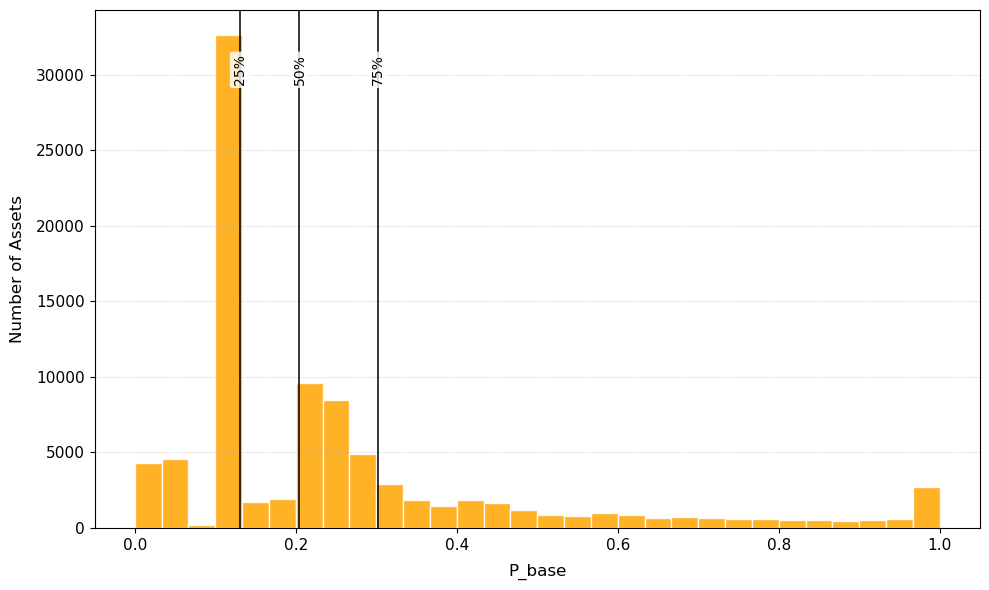

In [75]:
# Percentile markers
percentiles = [25, 50, 75]
perc_values = np.percentile(P_base_0_df['P_base'], percentiles)

# Plot setup
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(
    P_base_0_df['P_base'],
    bins=30,
    edgecolor='white',
    color='#FFA500',  # nice orange tone
    alpha=0.85
)

# Style grid
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.5)

# Draw vertical lines for percentiles
y_max = n.max()
for p, val in zip(percentiles, perc_values):
    plt.axvline(x=val, color='black', linestyle='-', linewidth=1.3, alpha=0.85)
    plt.text(
        val,
        y_max * 0.96,
        f"{p}%",
        rotation=90,
        fontsize=10,
        ha='center',
        va='top',
        color='black',
        bbox=dict(facecolor='white', edgecolor='none', alpha=0.8, boxstyle='round,pad=0.2')
    )

# Labels & title
plt.xlabel("P_base", fontsize=12, labelpad=8)
plt.ylabel("Number of Assets", fontsize=12, labelpad=8)

# Ticks
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.tight_layout()
plt.show()


In [76]:
p_base_cat = P_base_0_df.merge(
    asset_merged[['id', 'category']],
    left_index=True,
    right_on='id',
    how='left',
    suffixes=('', '_type')
)
p_base_cat.groupby(by='category')[['P_base']].mean().sort_values(by='P_base', ascending=False).round(2)

,P_base
category,
IT,0.76
Other,0.67
IoT,0.51
OT,0.46
Network,0.30
Uncategorized,0.19


In [77]:
min_value = asset_merged['computed_value'].min()
max_value = asset_merged['computed_value'].max()
mean_value = asset_merged['computed_value'].mean()


print(f"Minimum: {min_value}")
print(f"Maximum: {max_value}")
print(f"Average: {mean_value}")

Minimum: 0
Maximum: 2118262
Average: 49.925171038824764


In [142]:
metric = 'degree_centrality'  # or 'betweenness_centrality', 'closeness_centrality', etc.
min_val = 1_000.0
max_val = 2_500_000.0

vals = nodes[metric].values
v_min, v_max = vals.min(), vals.max()
denom = (v_max - v_min) or 1e-8
norm = (vals - v_min) / denom

p_base_cat['V_ind'] = max_val + (1 - norm) * (min_val - max_val)
p_base_cat.sort_values(by='V_ind', ascending=False)

,P_base,id,category,V_ind
104350,1.000000,48dcb782-a6f0-4863-b070-dac5deacb858,Network,2.500000e+06
8848,1.000000,a807012c-4456-4764-8e5a-4f52610429d5,IT,1.616121e+06
118301,1.000000,a551fc87-630f-4b89-8b43-4e89325c43cc,Network,1.471315e+06
118816,1.000000,2793f9b1-baa0-49d0-84b9-85ecc32bbb4a,IT,1.025577e+06
118384,1.000000,d84478e3-ec75-427a-a219-2053c49ef78e,IT,9.148788e+05
...,...,...,...,...
71318,0.130132,03f71670-9381-4963-ae39-db15d0219fc9,Network,1.000000e+03
55709,0.133011,774004f4-f4bd-4547-ad35-bb2a86dfbdfe,Network,1.000000e+03
61839,0.130132,12edf261-3ea1-45fa-b43c-da4936da8362,Network,1.000000e+03
57434,0.130132,ade91657-f307-48d6-b43a-66e286ce5034,Network,1.000000e+03


In [143]:
df_results_copy = p_base_cat.copy(deep=True)

In [144]:
V_ind_map = {
    row['id']: min_val + norm_val * (max_val - min_val)
    for row, norm_val in zip(df_results_copy.to_dict('records'), norm)}

raw_edges = pd.DataFrame([
    {'src': i, 'tgt': j, 'raw': m['p_ij']}
    for (i, j), m in p_ij.items()
])

scale_map = {}
for tgt, grp in raw_edges.groupby('tgt'):
    total = grp['raw'].sum() or 1e-8
    scale_map[tgt] = 1.0 / total

raw_edges['alpha'] = raw_edges.apply(
    lambda x: x['raw'] * scale_map[x['tgt']], axis=1
)

# Build parent_map for quick access later
parent_map = {node: [] for node in V_ind_map}
for _, row in raw_edges.iterrows():
    parent_map[row['tgt']].append((row['src'], row['alpha']))



In [145]:
V_dep = {}
for j in V_ind_map:
    if parent_map[j]:  # Only if j has parents (case 2)
        V_dep[j] = sum(alpha * V_ind_map[i] for i, alpha in parent_map[j])
    else:  # No parents (case 1)
        V_dep[j] = 0.0

# Compute V_tot by summing independent and dependent values
V_tot = {j: V_ind_map[j] + V_dep[j] for j in V_ind_map}

df_vals = pd.DataFrame({
    'asset_id': list(V_ind_map.keys()),
    'V_ind': list(V_ind_map.values()),
    'V_dep': [V_dep[j] for j in V_dep],
    'V_tot': [V_tot[j] for j in V_ind_map],
})


In [146]:
df_vals.sort_values(by='V_tot', ascending=False).head(10)

,asset_id,V_ind,V_dep,V_tot
393,f9718a01-4888-44b4-910e-45fdd61c7849,6193.814561,2500000.0,2.506194e+06
5218,89510066-8b7d-44d6-b307-4c373b678bbc,6116.294941,2500000.0,2.506116e+06
11554,07eebfee-5a46-4e6e-a732-d18a1d77edbd,6116.294941,2500000.0,2.506116e+06
66328,cb05ce33-1af4-4810-b3d3-3312f5e90edc,5108.539877,2500000.0,2.505109e+06
23531,54ad5e5e-eec6-4c6e-b7e6-e0eb574c1c55,5108.539877,2500000.0,2.505109e+06
10211,c323daa5-89bb-4c30-888c-faede8da8e1e,5108.539877,2500000.0,2.505109e+06
17217,e6096578-6bb1-4b0a-9e71-3c663bdf3353,4875.981016,2500000.0,2.504876e+06
4777,d33c4854-e6a2-48ff-81eb-dac51c51f170,3093.029748,2500000.0,2.503093e+06
278,f4b4dbee-55be-44c8-9663-b24eab574939,3015.510128,2500000.0,2.503016e+06
15142,a2251b95-f8c9-40b7-9070-e16acda7282b,2860.470887,2500000.0,2.502860e+06


In [147]:
EF = {}
for j in V_ind_map:
    if not parent_map[j]:  # Case (1)
        EF[j] = 1.0
    else:  # Case (2)
        EF[j] = V_dep[j] / V_tot[j] if V_tot[j] > 0 else 0.0

In [148]:
df_vals = pd.DataFrame({
    'asset_id': list(V_ind_map.keys()),
    'V_ind': list(V_ind_map.values()),
    'V_dep': [V_dep[j] for j in V_ind_map],
    'V_tot': [V_tot[j] for j in V_ind_map],
    'EF': [EF[j] for j in V_ind_map],
})
df_vals.sort_values(by='V_tot', ascending=False).head(10)

,asset_id,V_ind,V_dep,V_tot,EF
393,f9718a01-4888-44b4-910e-45fdd61c7849,6193.814561,2500000.0,2.506194e+06,0.997529
5218,89510066-8b7d-44d6-b307-4c373b678bbc,6116.294941,2500000.0,2.506116e+06,0.997559
11554,07eebfee-5a46-4e6e-a732-d18a1d77edbd,6116.294941,2500000.0,2.506116e+06,0.997559
66328,cb05ce33-1af4-4810-b3d3-3312f5e90edc,5108.539877,2500000.0,2.505109e+06,0.997961
23531,54ad5e5e-eec6-4c6e-b7e6-e0eb574c1c55,5108.539877,2500000.0,2.505109e+06,0.997961
10211,c323daa5-89bb-4c30-888c-faede8da8e1e,5108.539877,2500000.0,2.505109e+06,0.997961
17217,e6096578-6bb1-4b0a-9e71-3c663bdf3353,4875.981016,2500000.0,2.504876e+06,0.998053
4777,d33c4854-e6a2-48ff-81eb-dac51c51f170,3093.029748,2500000.0,2.503093e+06,0.998764
278,f4b4dbee-55be-44c8-9663-b24eab574939,3015.510128,2500000.0,2.503016e+06,0.998795
15142,a2251b95-f8c9-40b7-9070-e16acda7282b,2860.470887,2500000.0,2.502860e+06,0.998857


In [149]:
df_final = df_vals.copy()
df_final['P_base'] = p_base_cat['id'].map(P_base_0_df['P_base'])  # P_base for each asset
df_final['SLE'] = df_final['V_tot'] * df_vals['EF']   # single‐loss expectancy
df_final['ALE'] = df_final['SLE']   * df_final['P_base']  # annual loss expectancy
df_final = df_final.fillna(0)    

In [150]:
df_final.head()

,asset_id,V_ind,V_dep,V_tot,EF,P_base,SLE,ALE
0,e1f47d6d-7a65-49c4-b8a5-42301fce796b,1077.519620,3015.510128,4093.029748,0.736743,1.000000,3015.510128,3015.510128
1,e94e74c4-10aa-4428-a83d-43e20cbe8458,3015.510128,1153.124200,4168.634328,0.276619,0.674375,1153.124200,777.637900
2,5a5466d4-4031-4897-a25a-ba996941e528,1542.637342,12378.749309,13921.386651,0.889189,0.000000,12378.749309,0.000000
3,3c9a3f1f-5d91-49d7-8c33-ec66ee352e32,5186.059497,5862.971642,11049.031139,0.530632,0.226786,5862.971642,1329.639933
4,c937fafc-ea45-4f7b-9210-fd81a0faa687,1852.715823,53200.919559,55053.635382,0.966347,0.993027,53200.919559,52829.960002


In [151]:
df_final[['V_ind', 'V_dep', 'V_tot', 'EF', 'P_base', 'SLE', 'ALE']].describe().style.format({"SLE": "{:.2f}", "ALE": "{:.2f}", "V_tot": "{:.2f}", "EF": "{:.2f}", "P_base": "{:.2f}", "V_dep": "{:.2f}", "V_ind": "{:.2f}"})

,V_ind,V_dep,V_tot,EF,P_base,SLE,ALE
count,91354.00,91354.00,91354.00,91354.00,91354.00,91354.00,91354.00
mean,1488.91,1189765.50,1191254.41,0.99,0.21,1189812.01,257222.53
std,13989.16,895257.21,894848.21,0.05,0.22,895195.42,375926.40
min,1000.00,0.00,1000.00,0.00,0.00,1000.00,0.00
25%,1000.00,337394.91,339889.44,1.00,0.13,337394.91,1809.78
50%,1077.52,1471314.64,1472392.16,1.00,0.13,1471314.64,124740.07
75%,1077.52,1616121.29,1617198.81,1.00,0.27,1616121.29,328588.08
max,2500000.00,2500000.00,2506193.81,1.00,1.00,2500000.00,2500000.00


In [172]:
print(df_final[df_final['V_ind'] == 0.0].shape)
df_final[df_final['V_ind'] == 0.0]


(0, 8)


,asset_id,V_ind,V_dep,V_tot,EF,P_base,SLE,ALE


In [152]:
df_final['ALE'].sum()

23498306948.830482

In [155]:
df_final['V_ind'].sum()

136018014.51747993

In [153]:
df_final['V_tot'].sum()

108825855445.05704

/Users/ngantram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ngantram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


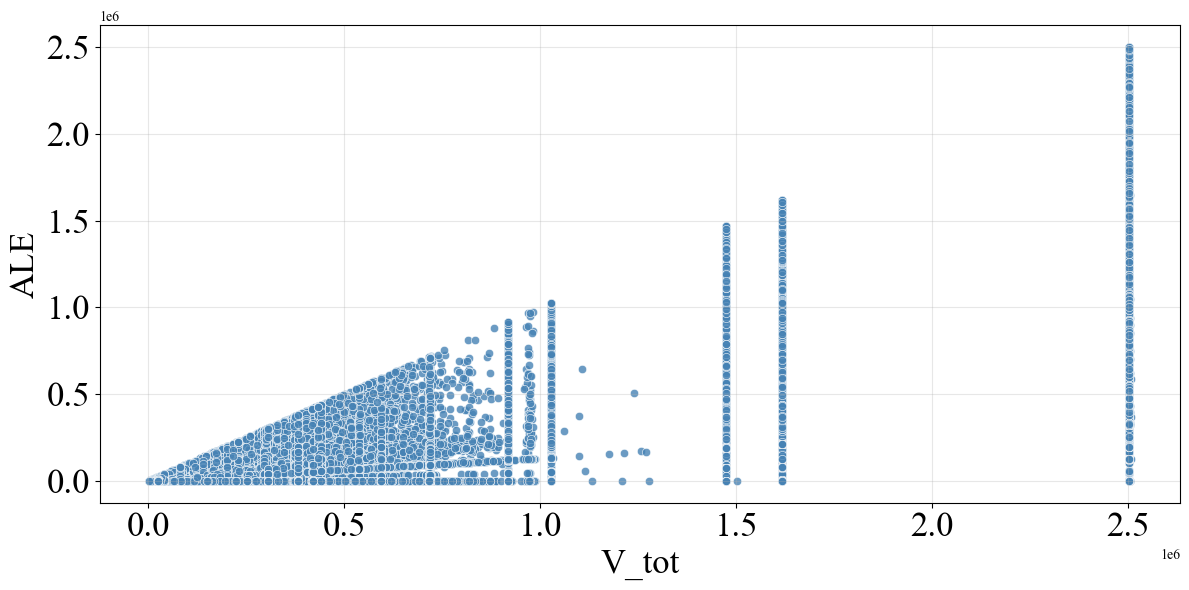

In [156]:
#ALE vs V_tot

plt.figure(figsize=(12, 6))

sns.scatterplot(
    data=df_final, 
    x='V_tot', 
    y='ALE',
    alpha=0.8,
    color='steelblue'
)

plt.xlabel("V_tot", fontsize=25)
plt.ylabel("ALE", fontsize=25)
plt.grid(True, linestyle='-', alpha=0.3)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.tight_layout()
plt.show()


/Users/ngantram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ngantram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


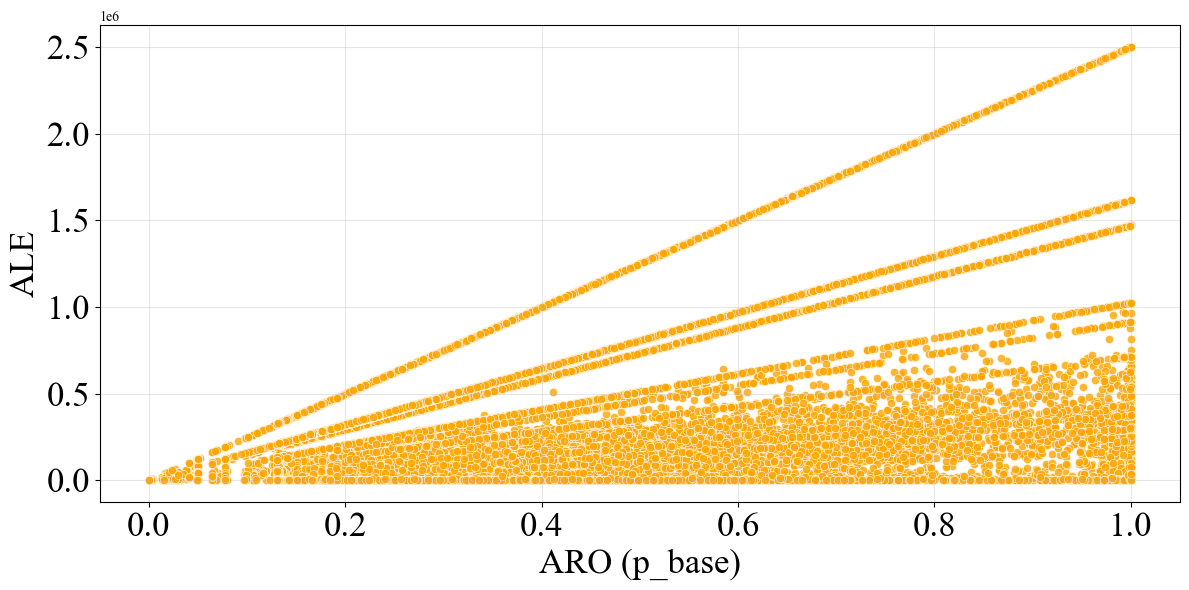

In [157]:
#ALE vs ARO
plt.figure(figsize=(12, 6))

sns.scatterplot(
    data=df_final, 
    x='P_base', 
    y='ALE',
    alpha=0.8,
    color='orange'
)

plt.xlabel("ARO (p_base)", fontsize=25)
plt.ylabel("ALE", fontsize=25)
plt.grid(True, linestyle='-', alpha=0.3)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.tight_layout()
plt.show()


/Users/ngantram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ngantram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


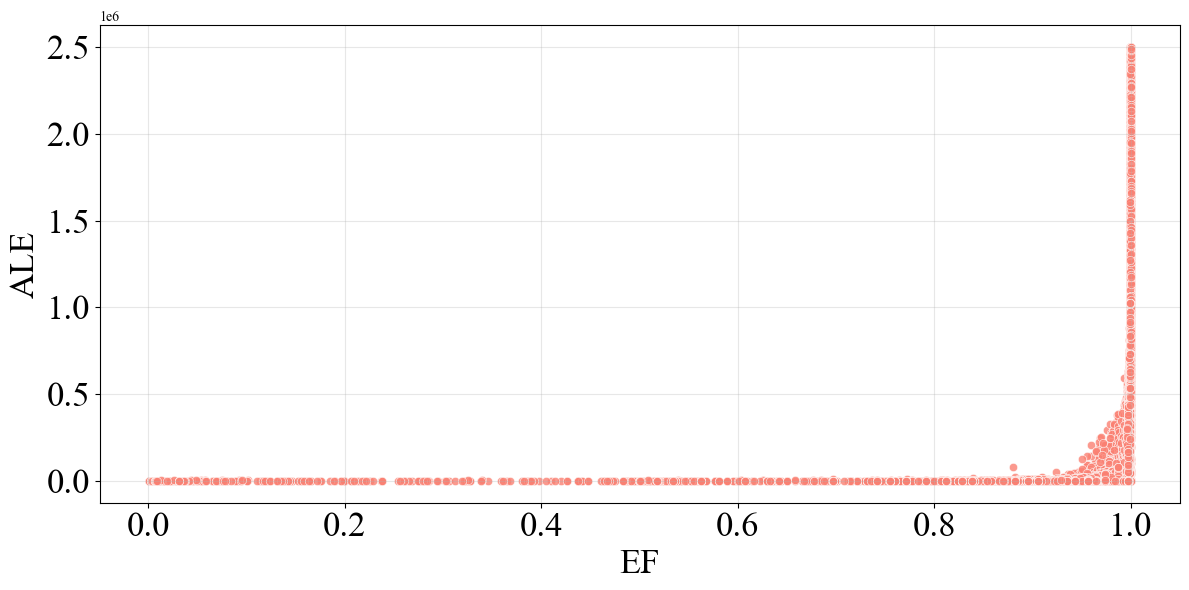

In [158]:
# ALE vs EF
plt.figure(figsize=(12, 6))

sns.scatterplot(
    data=df_final, 
    x='EF', 
    y='ALE',
    alpha=0.8,
    color='salmon'
)

plt.xlabel("EF", fontsize=25)
plt.ylabel("ALE", fontsize=25)
plt.grid(True, linestyle='-', alpha=0.3)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.tight_layout()
plt.show()


/Users/ngantram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ngantram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


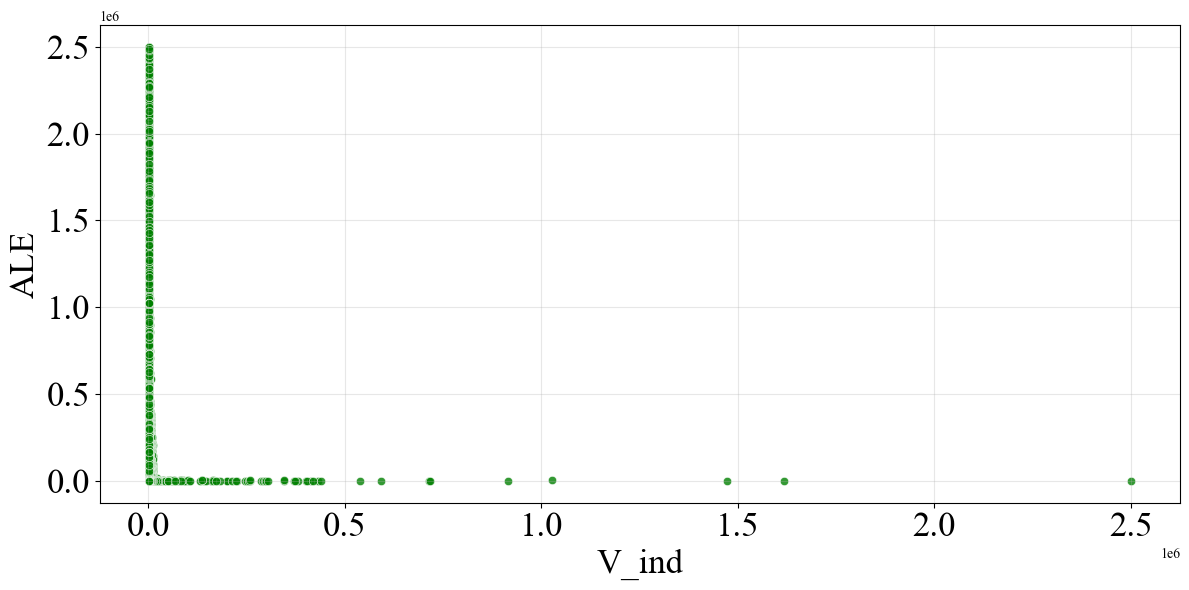

In [173]:
# ALE vs V_ind
plt.figure(figsize=(12, 6))
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman"]
sns.scatterplot(
    data=df_final, 
    x='V_ind', 
    y='ALE',
    alpha=0.8,
    color='green'
)

plt.xlabel("V_ind", fontsize=25)
plt.ylabel("ALE", fontsize=25)
plt.grid(True, linestyle='-', alpha=0.3)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.tight_layout()
plt.show()


/Users/ngantram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ngantram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


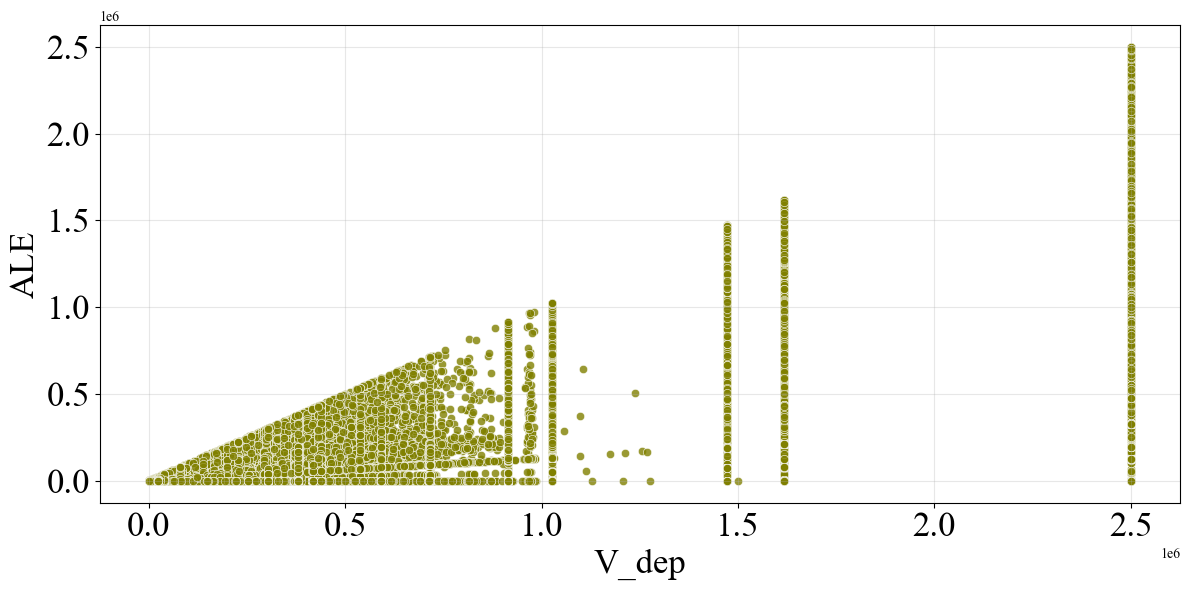

In [160]:
# ALE vs V_dep
plt.figure(figsize=(12, 6))
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman"]
sns.scatterplot(
    data=df_final, 
    x='V_dep', 
    y='ALE',
    alpha=0.8,
    color='olive'
)

plt.xlabel("V_dep", fontsize=25)
plt.ylabel("ALE", fontsize=25)
plt.grid(True, linestyle='-', alpha=0.3)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.tight_layout()
plt.show()

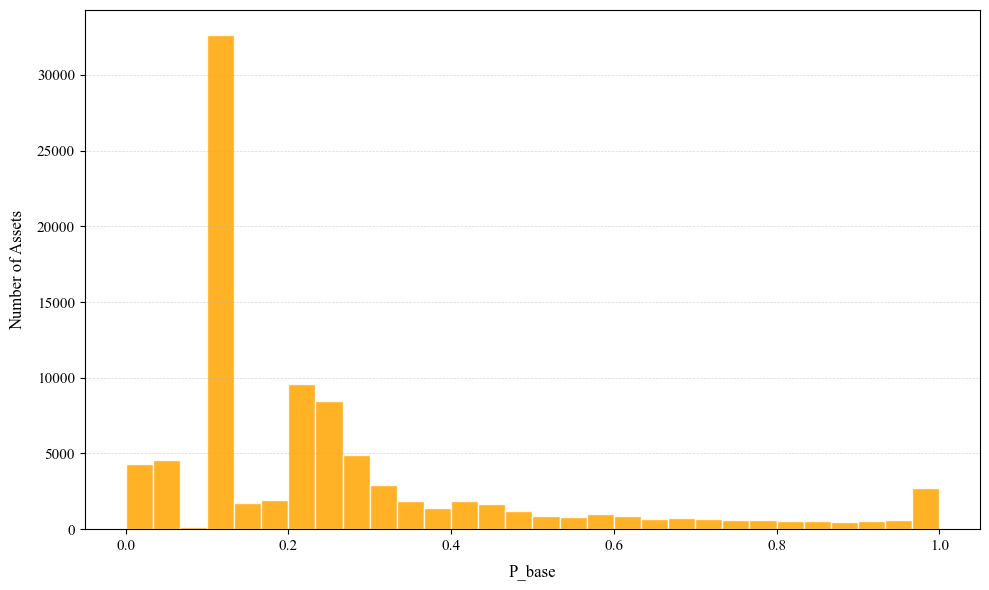

In [161]:
percentiles = [25, 50, 75]
perc_values = np.percentile(p_base_cat['P_base'], percentiles)

plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(
    p_base_cat['P_base'],
    bins=30,
    edgecolor='white',
    color='#FFA500',  
    alpha=0.85
)

plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.5)

plt.xlabel("P_base", fontsize=12, labelpad=8)
plt.ylabel("Number of Assets", fontsize=12, labelpad=8)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.tight_layout()
plt.show()


In [162]:
cols_df1 = asset_merged[['id', 'computed_value']]
cols_df2 = df_final[['asset_id', 'ALE']]

test_df = cols_df2.merge(cols_df1, left_on='asset_id', right_on='id', how='left')
test_df[['id', 'computed_value', 'ALE']].sort_values(by='computed_value', ascending=False)


,id,computed_value,ALE
190,a52170d6-b8c3-4754-bbed-1703f7e7673c,2118262,1204.724288
8,a551fc87-630f-4b89-8b43-4e89325c43cc,877522,408.525221
189,51868828-0428-4ed1-9ea1-88e75ecf49e3,241893,5710.339542
4,c937fafc-ea45-4f7b-9210-fd81a0faa687,232841,52829.960002
17,08f8567f-d440-46b9-86b1-2c5f3e1a2771,151082,0.000000
...,...,...,...
30720,ac61faf3-b685-4e52-9ee7-cfad049f0675,0,308027.110627
30719,3d3c354f-a0ff-4b9b-aa94-19d856547667,0,133460.584114
30718,a952b1b2-2c56-401f-a8ae-9d0ddea6fb51,0,354050.406499
30717,813f2d35-a11f-4bb4-b6d8-4d33e8056f37,0,293805.132571


/Users/ngantram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ngantram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ngantram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ngantram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

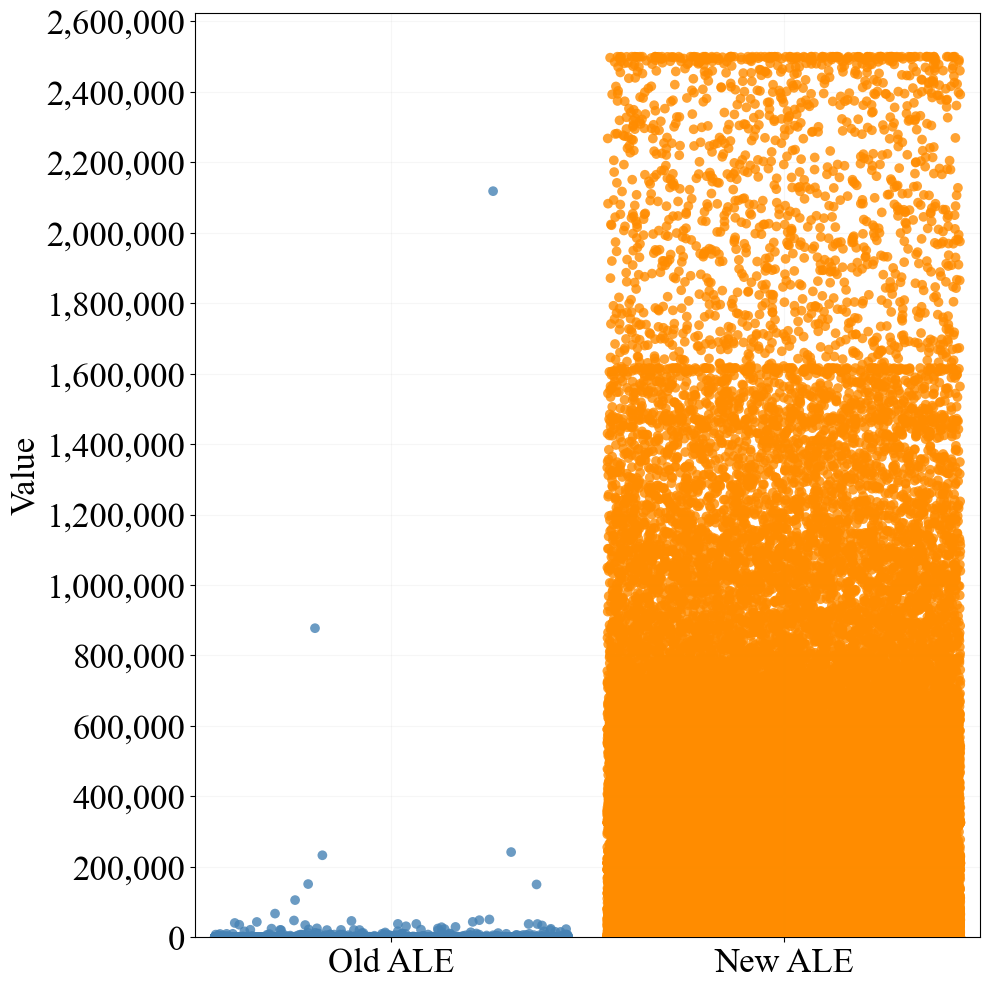

In [163]:
from matplotlib import ticker

melted = test_df.melt(
    value_vars=['computed_value','ALE'],
    var_name='Metric',
    value_name='Value'
)
melted['Metric'] = melted['Metric'].replace({
    'computed_value': 'Old ALE',
    'ALE':             'New ALE'
})

plt.figure(figsize=(10,10))

ax = sns.stripplot(
    data=melted,
    x='Metric',
    y='Value',
    jitter=0.45,                   
    size=7,
    edgecolor=['navy', 'darkorange'],
    alpha=0.8,
    palette=['steelblue','darkorange']
)

ymax = melted['Value'].max()
ax.set_ylim(0, ymax * 1.05)
ax.yaxis.set_major_locator(ticker.MultipleLocator(200000))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

ax.set_xlabel("", fontsize=25)
ax.set_ylabel("Value", fontsize=25)
ax.tick_params(labelsize=25)
plt.grid(True, which='major', linestyle='-', alpha=0.1)
plt.tight_layout()
plt.show()


In [164]:
print(test_df[test_df['computed_value'] == 0.0].shape)
test_df[test_df['computed_value'] == 0.0]

(90754, 4)


,asset_id,ALE,id,computed_value
7,ccef7626-94c0-49db-8ab1-4167f8d09aae,1.712841e+03,ccef7626-94c0-49db-8ab1-4167f8d09aae,0
9,8d3746a4-24bf-4cd2-b2ae-9ac13fa965ce,3.374578e+05,8d3746a4-24bf-4cd2-b2ae-9ac13fa965ce,0
12,608795d1-5397-47f5-82e4-adc4cc8c2f99,1.048710e+06,608795d1-5397-47f5-82e4-adc4cc8c2f99,0
14,15dfe0ca-cef2-4de8-ad78-0c0e795a2461,5.132507e+04,15dfe0ca-cef2-4de8-ad78-0c0e795a2461,0
15,b0c1b7f7-e177-441f-9c7e-141f36222c0d,6.310886e+03,b0c1b7f7-e177-441f-9c7e-141f36222c0d,0
...,...,...,...,...
91349,00c4dabf-27e1-4779-8f86-c862c934d6f1,0.000000e+00,00c4dabf-27e1-4779-8f86-c862c934d6f1,0
91350,42c33c0e-13e5-4803-9b2b-9a22a8de524d,0.000000e+00,42c33c0e-13e5-4803-9b2b-9a22a8de524d,0
91351,cc4707d7-d8d5-40a8-aeca-a6132b910a61,0.000000e+00,cc4707d7-d8d5-40a8-aeca-a6132b910a61,0
91352,5a0ffd44-02f7-408e-a9c8-72d87d7b3da6,0.000000e+00,5a0ffd44-02f7-408e-a9c8-72d87d7b3da6,0


In [165]:
print(test_df[test_df['ALE'] == 0.0].shape)
test_df[test_df['ALE'] == 0.0]


(19491, 4)


,asset_id,ALE,id,computed_value
2,5a5466d4-4031-4897-a25a-ba996941e528,0.0,5a5466d4-4031-4897-a25a-ba996941e528,659
10,77fb5cf3-cfe3-4367-b6a2-e25ccd04e4b2,0.0,77fb5cf3-cfe3-4367-b6a2-e25ccd04e4b2,105584
17,08f8567f-d440-46b9-86b1-2c5f3e1a2771,0.0,08f8567f-d440-46b9-86b1-2c5f3e1a2771,151082
29,768e8534-87ff-4d29-a439-cc82ad487157,0.0,768e8534-87ff-4d29-a439-cc82ad487157,10164
38,a807012c-4456-4764-8e5a-4f52610429d5,0.0,a807012c-4456-4764-8e5a-4f52610429d5,37702
...,...,...,...,...
91349,00c4dabf-27e1-4779-8f86-c862c934d6f1,0.0,00c4dabf-27e1-4779-8f86-c862c934d6f1,0
91350,42c33c0e-13e5-4803-9b2b-9a22a8de524d,0.0,42c33c0e-13e5-4803-9b2b-9a22a8de524d,0
91351,cc4707d7-d8d5-40a8-aeca-a6132b910a61,0.0,cc4707d7-d8d5-40a8-aeca-a6132b910a61,0
91352,5a0ffd44-02f7-408e-a9c8-72d87d7b3da6,0.0,5a0ffd44-02f7-408e-a9c8-72d87d7b3da6,0


/Users/ngantram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ngantram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


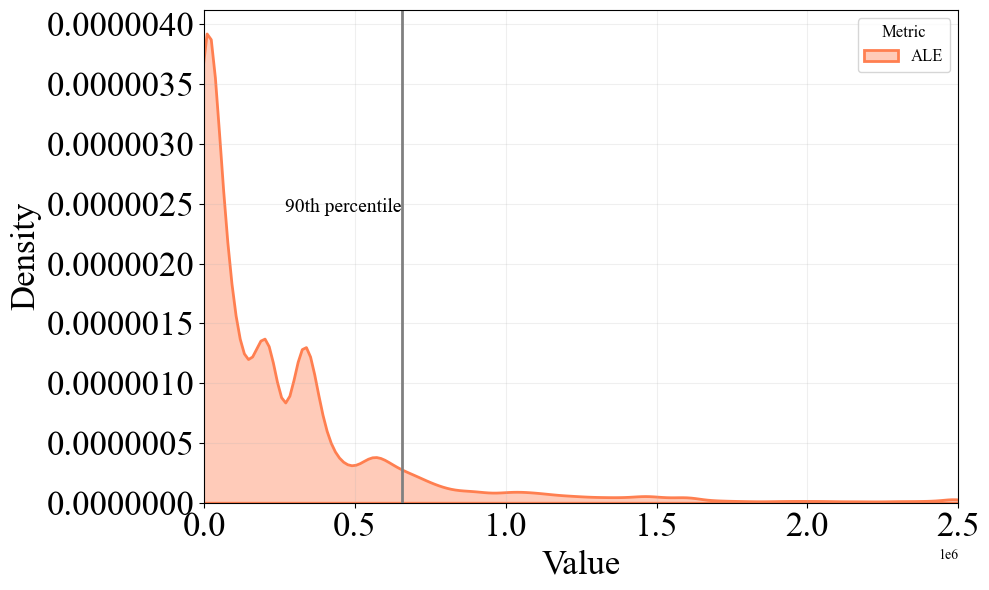

In [166]:
thr = test_df['ALE'].quantile(0.90)
plt.figure(figsize=(10, 6))
ax = plt.gca()

sns.kdeplot(
    data=test_df,
    x='ALE',
    fill=True,
    label='ALE',
    color='coral',
    alpha=0.4,
    linewidth=2,
)
ax.axvline(thr, color='grey', linestyle='-', linewidth=2)
ax.text(thr, ax.get_ylim()[1]*0.6, '90th percentile', 
        ha='right', va='center', fontsize=14, color='black')
ax.ticklabel_format(axis='y', style='plain')

plt.xlabel("Value", fontsize=25)
plt.ylabel("Density", fontsize=25)
plt.legend(title="Metric", fontsize=12, title_fontsize=12, loc='upper right')
plt.grid(True, linestyle='-', alpha=0.2)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlim(0, 1.0 * test_df[['ALE']].max().max())  
plt.tight_layout()
plt.show()


In [167]:
df_final.to_csv('/Users/ngantram/Documents/Thesis UvA/Thesis/code/backend_final_result.csv', index=False)

In [168]:
df = df_final.copy()

In [169]:
df['log_AV'] = np.log(df['V_tot'])
df['log_EF'] = np.log(df['EF'])
df['log_ARO'] = np.log(df['P_base'])
df['log_ALE'] = np.log(df['ALE'])
df['log_Vind'] = np.log(df['V_ind'])
df['log_Vdep'] = np.log(df['V_dep'])


cols_1 = ['log_ALE', 'log_AV', 'log_EF', 'log_ARO', 'log_Vind', 'log_Vdep']
subset_1 = df[cols_1]
corr_1 = subset_1.corr()
corr_1.round(3)

/Users/ngantram/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/ngantram/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/ngantram/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,log_ALE,log_AV,log_EF,log_ARO,log_Vind,log_Vdep
log_ALE,1.000,0.925,0.190,0.366,-0.187,0.872
log_AV,0.925,1.000,0.119,-0.005,-0.125,0.993
log_EF,0.190,0.119,1.000,-0.007,-0.582,0.317
log_ARO,0.366,-0.005,-0.007,1.000,0.006,-0.010
log_Vind,-0.187,-0.125,-0.582,0.006,1.000,-0.347
log_Vdep,0.872,0.993,0.317,-0.010,-0.347,1.000


/Users/ngantram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ngantram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


25th percentile = 337394.91, 75th percentile = 1616121.29


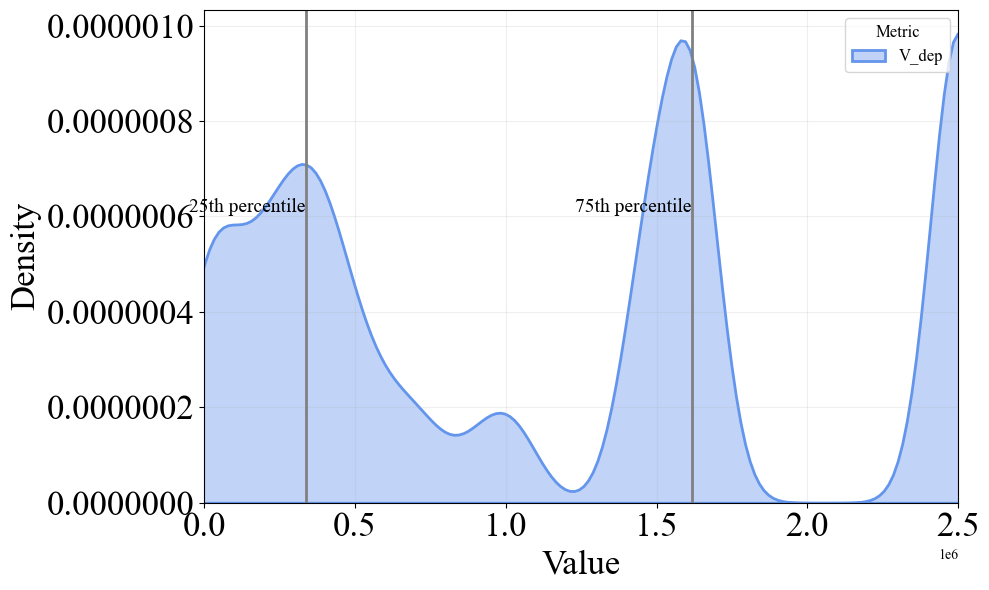

In [177]:
thr_25 = df_final['V_dep'].quantile(0.25)
thr_75 = df_final['V_dep'].quantile(0.75)
plt.figure(figsize=(10, 6))
ax = plt.gca()

sns.kdeplot(
    data=df_final,
    x='V_dep',
    fill=True,
    label='V_dep',
    color='cornflowerblue',
    alpha=0.4,
    linewidth=2,
)
ax.axvline(thr_25, color='grey', linestyle='-', linewidth=2)
ax.text(thr_25, ax.get_ylim()[1]*0.6, '25th percentile', 
        ha='right', va='center', fontsize=14, color='black')
ax.axvline(thr_75, color='grey', linestyle='-', linewidth=2)
ax.text(thr_75, ax.get_ylim()[1]*0.6, '75th percentile', 
        ha='right', va='center', fontsize=14, color='black')
ax.ticklabel_format(axis='y', style='plain')
print(f"25th percentile = {thr_25:.2f}, 75th percentile = {thr_75:.2f}")
plt.xlabel("Value", fontsize=25)
plt.ylabel("Density", fontsize=25)
plt.legend(title="Metric", fontsize=12, title_fontsize=12, loc='upper right')
plt.grid(True, linestyle='-', alpha=0.2)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlim(0, 1.0 * df_final[['V_dep']].max().max())  
plt.tight_layout()
plt.show()


/Users/ngantram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ngantram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


25th percentile = 337394.91, 75th percentile = 1616121.29


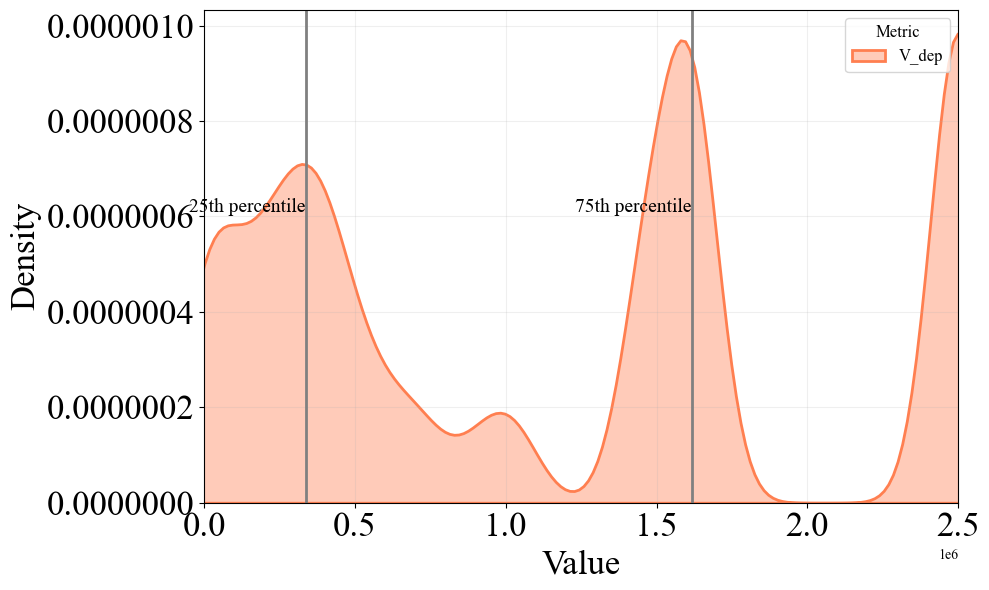

In [178]:
thr_25 = df_final['V_dep'].quantile(0.25)
thr_75 = df_final['V_dep'].quantile(0.75)
plt.figure(figsize=(10, 6))
ax = plt.gca()

sns.kdeplot(
    data=df_final,
    x='V_dep',
    fill=True,
    label='V_dep',
    color='coral',
    alpha=0.4,
    linewidth=2,
)
ax.axvline(thr_25, color='grey', linestyle='-', linewidth=2)
ax.text(thr_25, ax.get_ylim()[1]*0.6, '25th percentile', 
        ha='right', va='center', fontsize=14, color='black')
ax.axvline(thr_75, color='grey', linestyle='-', linewidth=2)
ax.text(thr_75, ax.get_ylim()[1]*0.6, '75th percentile', 
        ha='right', va='center', fontsize=14, color='black')
ax.ticklabel_format(axis='y', style='plain')
print(f"25th percentile = {thr_25:.2f}, 75th percentile = {thr_75:.2f}")
plt.xlabel("Value", fontsize=25)
plt.ylabel("Density", fontsize=25)
plt.legend(title="Metric", fontsize=12, title_fontsize=12, loc='upper right')
plt.grid(True, linestyle='-', alpha=0.2)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlim(0, 1.0 * df_final[['V_dep']].max().max())  
plt.tight_layout()
plt.show()
